# 593 EDA and Visualization Final Project
# NBA Players Dataset 🏀

Summer 2023

Group:
* Amadeo Cabanela
* Vaishnave Jonnalagadda
* Abdou Kaba


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

# Dataset
Link: https://www.kaggle.com/datasets/ricardotorresheredia/nba-stats-from-the-last-71-years

# Exploratory Data Analysis (EDA)

### 0. Read in the data

In [ ]:
df_nba_raw = pd.read_excel("/content/drive/MyDrive/USF MSDS/593 EDA and Visualization/Final Project/data/NBA_Stats_71_Years_Updated.xlsx")
df_nba_raw.head(2)

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,...,745,170,NaN,NaN,NaN,250,1674,1786,NaN,NaN
1,2,1951-52,1951,Regular Season,600012,George Mikan,1610612747,MNL,64,2572,...,866,194,NaN,NaN,NaN,286,1523,1592,NaN,NaN


### 1. Get an initial sniff of the data

How big is this data and what are the column names and their datatypes?

In [ ]:
df_nba_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33330 entries, 0 to 33329
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                33330 non-null  int64  
 1   Year                33330 non-null  object 
 2   Season Start Year   33330 non-null  int64  
 3   Season Type         33330 non-null  object 
 4   Player ID           33330 non-null  int64  
 5   Player              33330 non-null  object 
 6   Team ID             33330 non-null  int64  
 7   Team                33330 non-null  object 
 8   Games Played        33330 non-null  int64  
 9   Minutes Played      33330 non-null  int64  
 10  FG Made             33330 non-null  int64  
 11  FG Attempts         33330 non-null  int64  
 12  FG %                33330 non-null  float64
 13  3-Pt FG Made        27034 non-null  float64
 14  3-Pt FG Attempts    27034 non-null  float64
 15  3-Pt FG %           27034 non-null  float64
 16  FT M

In [ ]:
df_nba_raw.shape

(33330, 31)

In [ ]:
df_nba_raw.iloc[0]

Rank                               1
Year                         1951-52
Season Start Year               1951
Season Type           Regular Season
Player ID                      76056
Player                   Paul Arizin
Team ID                   1610612744
Team                             PHW
Games Played                      66
Minutes Played                  2939
FG Made                          548
FG Attempts                     1222
FG %                           0.448
3-Pt FG Made                     NaN
3-Pt FG Attempts                 NaN
3-Pt FG %                        NaN
FT Made                          578
FT Attempts                      707
FT %                           0.818
Offensive Rebounds               NaN
Defensive Rebounds               NaN
Rebounds                         745
Assists                          170
Steals                           NaN
Blocks                           NaN
Turnovers                        NaN
Personal Fouls                   250
P

## Check Missing Values

Any missing values? At least those signified with NaN.

In [ ]:
df_nba_raw.isnull().any()

Rank                  False
Year                  False
Season Start Year     False
Season Type           False
Player ID             False
Player                False
Team ID               False
Team                  False
Games Played          False
Minutes Played        False
FG Made               False
FG Attempts           False
FG %                  False
3-Pt FG Made           True
3-Pt FG Attempts       True
3-Pt FG %              True
FT Made               False
FT Attempts           False
FT %                  False
Offensive Rebounds     True
Defensive Rebounds     True
Rebounds              False
Assists               False
Steals                 True
Blocks                 True
Turnovers              True
Personal Fouls        False
Points Scored         False
Efficency             False
AST/TOV                True
STL/TOV                True
dtype: bool

In [ ]:
df_nba_raw.isnull().sum()

Rank                     0
Year                     0
Season Start Year        0
Season Type              0
Player ID                0
Player                   0
Team ID                  0
Team                     0
Games Played             0
Minutes Played           0
FG Made                  0
FG Attempts              0
FG %                     0
3-Pt FG Made          6296
3-Pt FG Attempts      6296
3-Pt FG %             6296
FT Made                  0
FT Attempts              0
FT %                     0
Offensive Rebounds    4229
Defensive Rebounds    4229
Rebounds                 0
Assists                  0
Steals                4229
Blocks                4229
Turnovers             5566
Personal Fouls           0
Points Scored            0
Efficency                0
AST/TOV               5566
STL/TOV               5566
dtype: int64

<div class="alert alert-block alert-success">
Few things we notice so far:
<ul>
<li> This data set is complicated! There are a lot of rows and columns of different types.</li>
<li> Target column? I would say <b>efficiency</b></li>
<li> Some "obvious" features? rank, year, minutes played, rebounds, assists, steals, personal fours, points scored</li>
<li> Some features that might need some work: team (since team names changed) FG %, AST/TOV, STL/TOV, Player ID, Team ID </li>
<li> Some featuers that might not be meaningful to my target variable so I can ignore: Player ID, Team ID
</ul>
</div>

### 3. Basic exploration of numerical features

### `Points Scored` column

In [ ]:
df_nba_raw['Points Scored'].describe()

count    33330.000000
mean       412.974707
std        479.009729
min          0.000000
25%         48.000000
50%        209.000000
75%        645.000000
max       4029.000000
Name: Points Scored, dtype: float64

<div class="alert alert-block alert-success">
We can check the histogram, quantiles, and the few largest and smallest values to get a closer look:
</div>

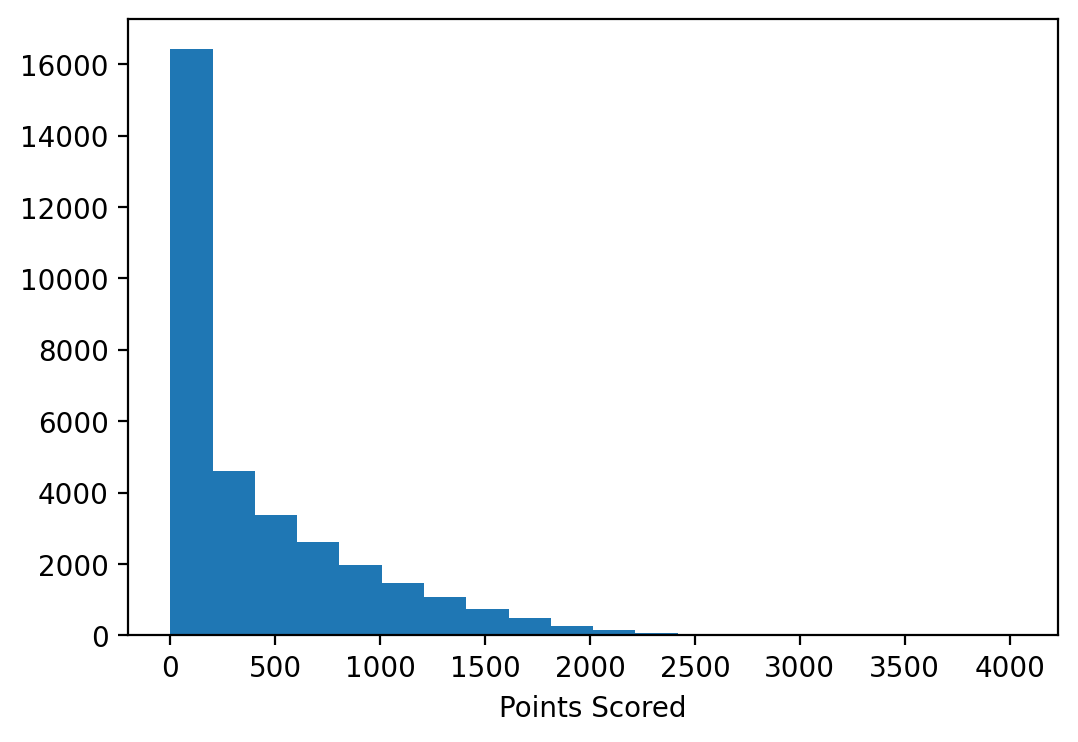

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df_nba_raw['Points Scored'], bins=20)
ax.set_xlabel("Points Scored")
plt.show()

In [ ]:
df_nba_raw['Points Scored'].quantile([.0, 0.001, 0.25, .5, 0.75, 0.999, 1])
#majority is between 48 and 2468

0.000       0.000
0.001       0.000
0.250      48.000
0.500     209.000
0.750     645.000
0.999    2468.381
1.000    4029.000
Name: Points Scored, dtype: float64

How many people scored zero?

In [ ]:
(df_nba_raw['Points Scored'] == 0).astype(int).sum()

784

In [ ]:
df_nba_raw['Points Scored'].sort_values(ascending=False).head(20)

1645     4029
1822     3586
9428     3041
1493     3033
2002     2948
9947     2868
20719    2832
4524     2831
3686     2822
29485    2818
2510     2775
11003    2753
3956     2719
1823     2719
1334     2707
2353     2649
10467    2633
3404     2596
25958    2593
6296     2585
Name: Points Scored, dtype: int64

In [ ]:
df_nba_raw.dtypes

Rank                    int64
Year                   object
Season Start Year       int64
Season Type            object
Player ID               int64
Player                 object
Team ID                 int64
Team                   object
Games Played            int64
Minutes Played          int64
FG Made                 int64
FG Attempts             int64
FG %                  float64
3-Pt FG Made          float64
3-Pt FG Attempts      float64
3-Pt FG %             float64
FT Made                 int64
FT Attempts             int64
FT %                  float64
Offensive Rebounds    float64
Defensive Rebounds    float64
Rebounds                int64
Assists                 int64
Steals                float64
Blocks                float64
Turnovers             float64
Personal Fouls          int64
Points Scored           int64
Efficency               int64
AST/TOV               float64
STL/TOV               float64
dtype: object

In [ ]:
plt.rcParams.update({'font.size': 14})

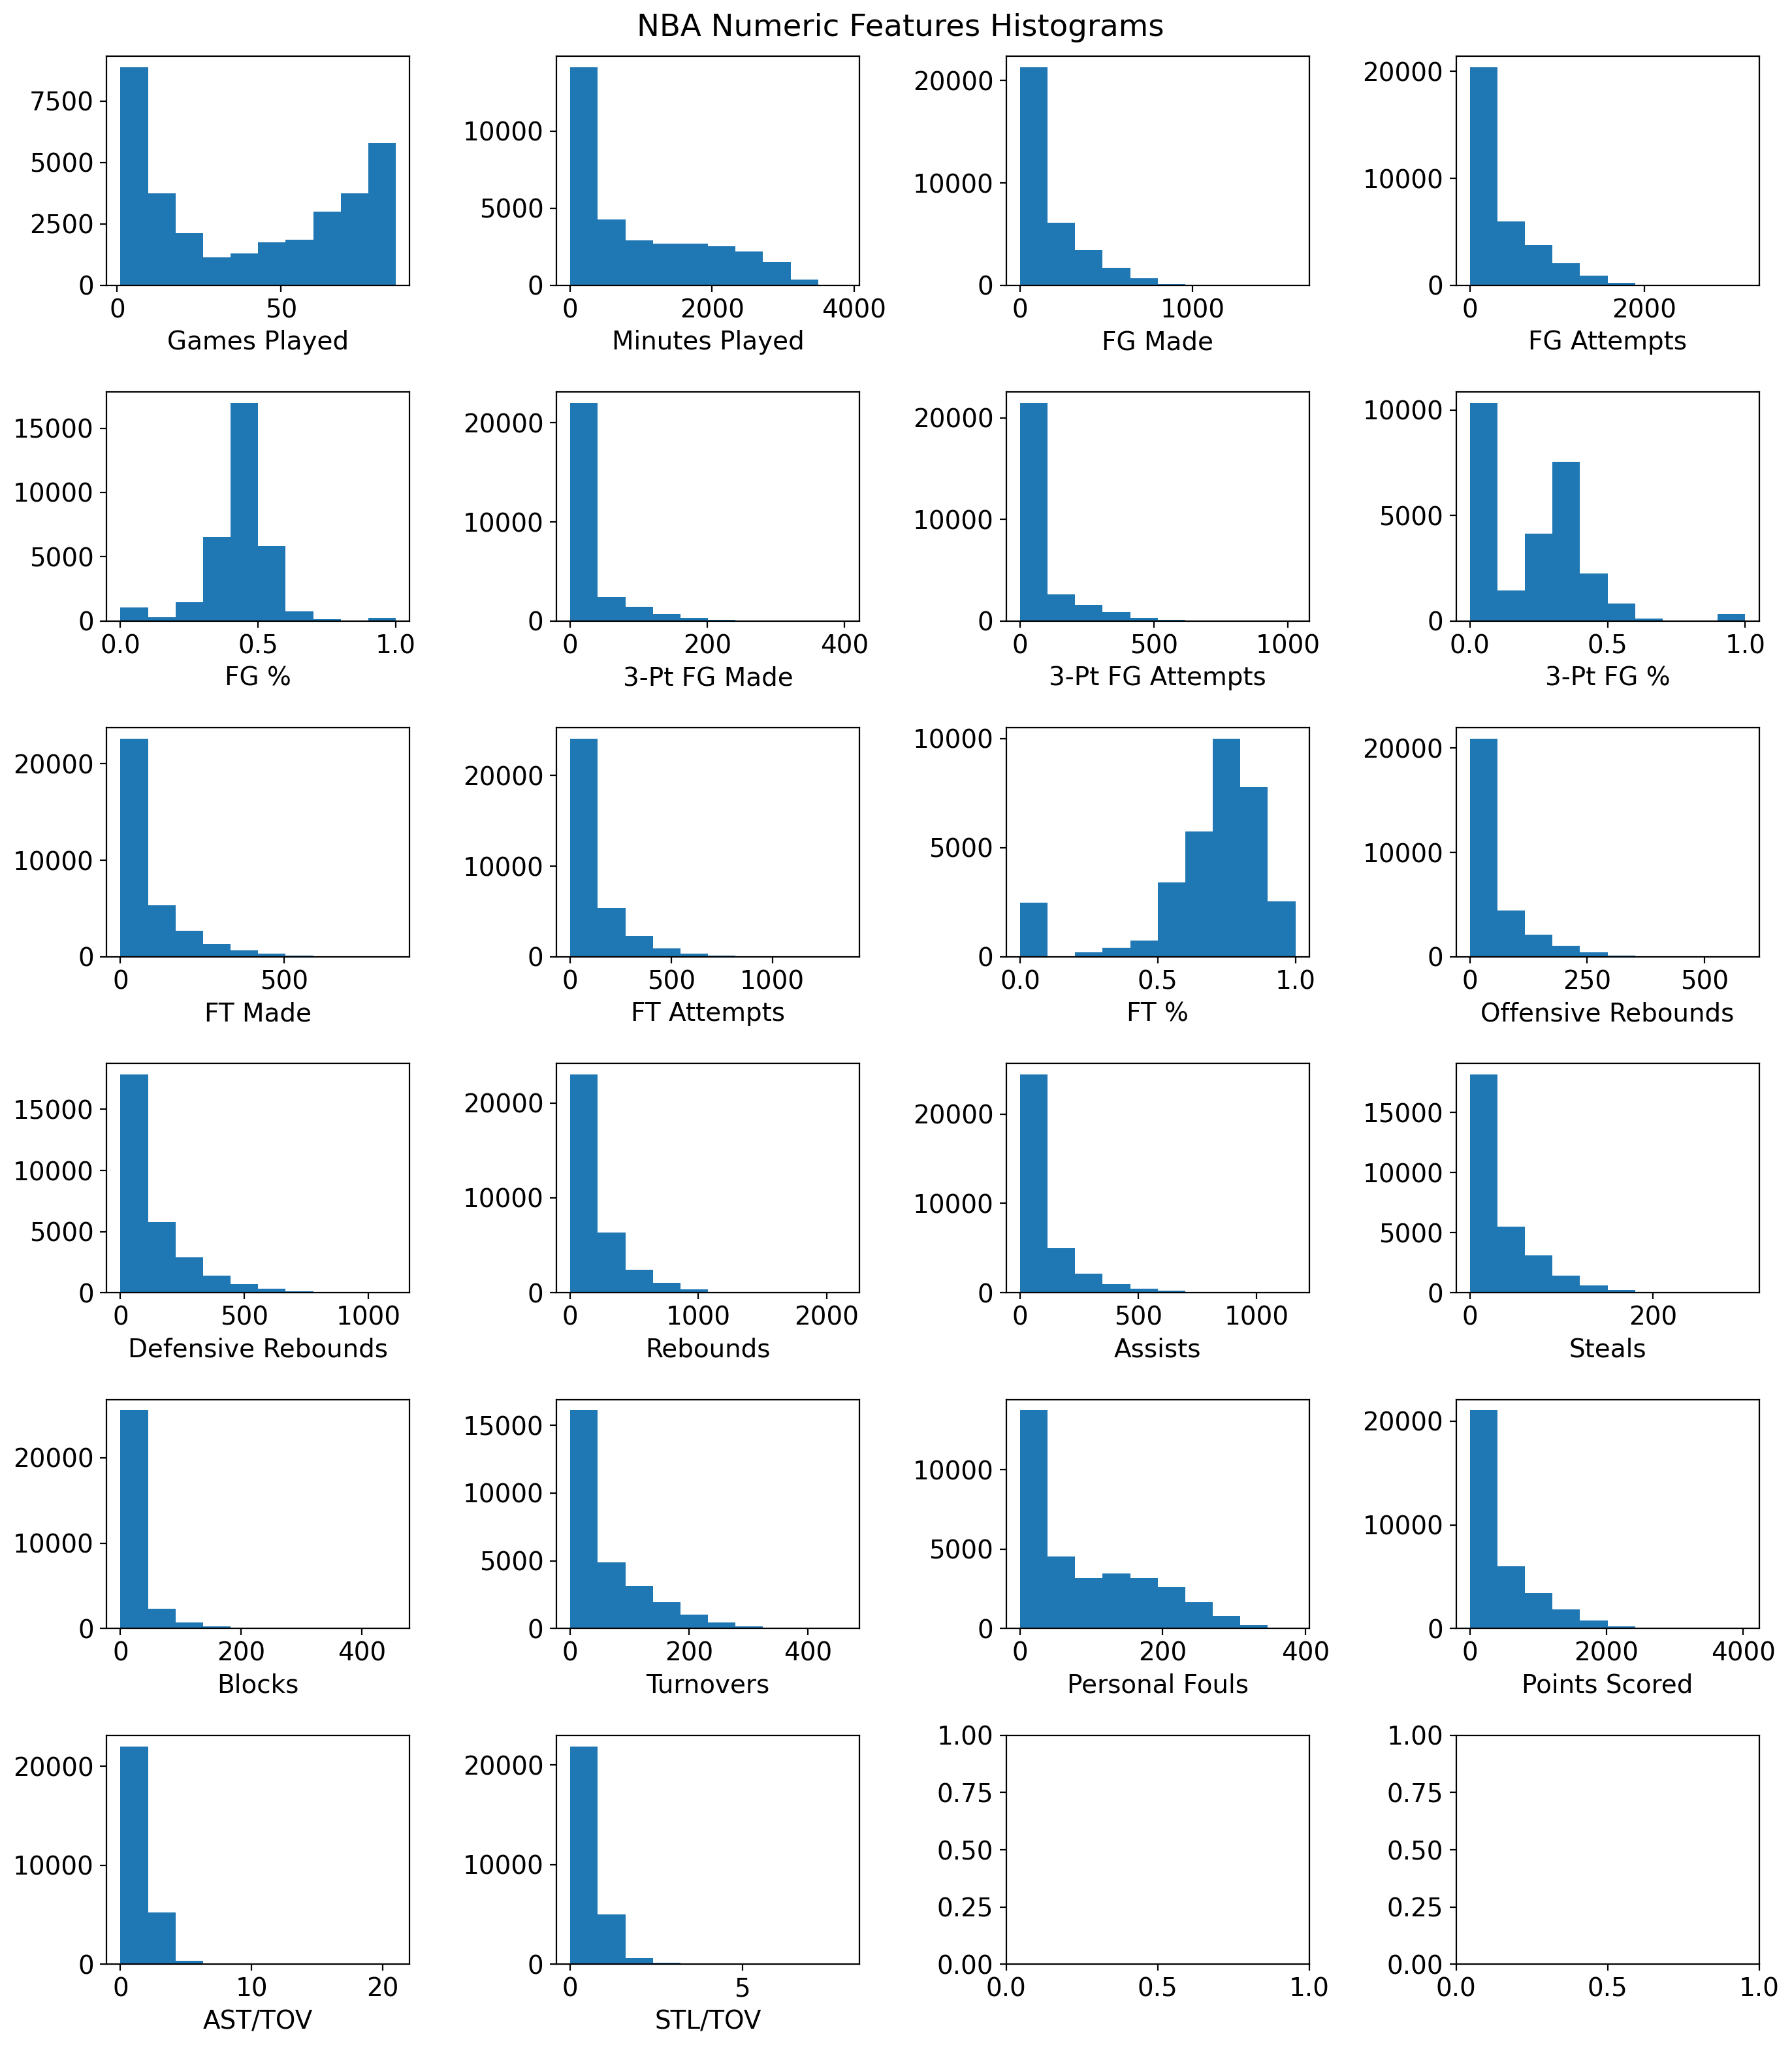

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(14,16))
axes[0][0].hist(df_nba_raw['Games Played'])
axes[0][0].set_xlabel("Games Played")
axes[0][1].hist(df_nba_raw['Minutes Played'])
axes[0][1].set_xlabel("Minutes Played")
axes[0][2].hist(df_nba_raw['FG Made'])
axes[0][2].set_xlabel("FG Made")
axes[0][3].hist(df_nba_raw['FG Attempts'])
axes[0][3].set_xlabel("FG Attempts")
axes[1][0].hist(df_nba_raw['FG %'])
axes[1][0].set_xlabel("FG %")
axes[1][1].hist(df_nba_raw['3-Pt FG Made'])
axes[1][1].set_xlabel("3-Pt FG Made")
axes[1][2].hist(df_nba_raw['3-Pt FG Attempts'])
axes[1][2].set_xlabel("3-Pt FG Attempts")
axes[1][3].hist(df_nba_raw['3-Pt FG %'])
axes[1][3].set_xlabel("3-Pt FG %")
axes[2][0].hist(df_nba_raw['FT Made'])
axes[2][0].set_xlabel("FT Made")
axes[2][1].hist(df_nba_raw['FT Attempts'])
axes[2][1].set_xlabel("FT Attempts")
axes[2][2].hist(df_nba_raw['FT %'])
axes[2][2].set_xlabel("FT %")
axes[2][3].hist(df_nba_raw['Offensive Rebounds'])
axes[2][3].set_xlabel("Offensive Rebounds")
axes[3][0].hist(df_nba_raw['Defensive Rebounds'])
axes[3][0].set_xlabel("Defensive Rebounds")
axes[3][1].hist(df_nba_raw['Rebounds'])
axes[3][1].set_xlabel("Rebounds")
axes[3][2].hist(df_nba_raw['Assists'])
axes[3][2].set_xlabel("Assists")
axes[3][3].hist(df_nba_raw['Steals'])
axes[3][3].set_xlabel("Steals")
axes[4][0].hist(df_nba_raw['Blocks'])
axes[4][0].set_xlabel("Blocks")
axes[4][1].hist(df_nba_raw['Turnovers'])
axes[4][1].set_xlabel("Turnovers")
axes[4][2].hist(df_nba_raw['Personal Fouls'])
axes[4][2].set_xlabel("Personal Fouls")
axes[4][3].hist(df_nba_raw['Points Scored'])
axes[4][3].set_xlabel("Points Scored")
axes[5][0].hist(df_nba_raw['AST/TOV'])
axes[5][0].set_xlabel("AST/TOV")
axes[5][1].hist(df_nba_raw['STL/TOV'])
axes[5][1].set_xlabel("STL/TOV")
fig.suptitle("NBA Numeric Features Histograms")
plt.tight_layout()
plt.show()

### 4. Basic exploration of categorical features

What teams are there?

In [ ]:
df_nba_raw['Team'].unique()

array(['PHW', 'MNL', 'BOS', 'ROC', 'FTW', 'BAL', 'NYK', 'INO', 'SYR',
       'MIH', 'STL', 'DET', 'CIN', 'LAL', 'CHP', 'SFW', 'CHZ', 'BLT',
       'PHL', 'CHI', 'SEA', 'SDR', 'PHX', 'ATL', 'MIL', 'POR', 'BUF',
       'CLE', 'HOU', 'GOS', 'KCK', 'CAP', 'WAS', 'NOJ', 'DEN', 'IND',
       'SAN', 'NYN', 'NJN', 'SDC', 'UTH', 'DAL', 'LAC', 'SAC', 'CHH',
       'MIA', 'MIN', 'ORL', 'TOR', 'VAN', 'UTA', 'GSW', 'PHI', 'SAS',
       'MEM', 'NOH', 'CHA', 'NOK', 'OKC', 'BKN', 'NOP'], dtype=object)

How many teams are there? *Some teams relocated or changed names, so some of the team acronyms above are redundant.*

What players are there?

In [ ]:
df_nba_raw['Player'].unique()

array(['Paul Arizin', 'George Mikan', 'Bob Cousy', ..., 'Stanley Umude',
       'Alondes Williams', 'Michael Foster Jr.'], dtype=object)

How many players are there?

In [ ]:
len(df_nba_raw['Player'].unique())

4387

Let's check for the season type:

In [ ]:
df_nba_raw['Season Type'].unique()

array(['Regular Season', 'Playoffs'], dtype=object)

### 5.  Explore the relationships between features and target

<ipython-input-85-5403aee6cb3f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_map = sb.heatmap(df_nba_raw.corr(), cmap="YlGnBu")


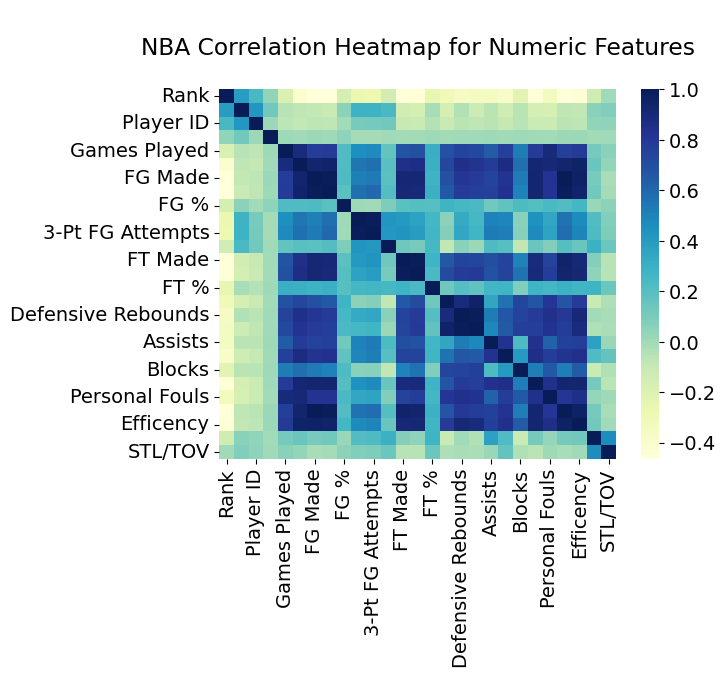

In [ ]:
corr_map = sns.heatmap(df_nba_raw.corr(), cmap="YlGnBu")
corr_map.set_title("\nNBA Correlation Heatmap for Numeric Features\n")
plt.show()

# Data Cleaning and Preparation

### **Primary Dataset: NBA Players from Kaggle**

In [5]:
df_nba_raw = pd.read_excel("/content/drive/MyDrive/Final Project - 593 EDA and Visualization/data/NBA_Stats_71_Years_Updated.xlsx")
df_nba_raw

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,...,745,170,NaN,NaN,NaN,250,1674,1786,NaN,NaN
1,2,1951-52,1951,Regular Season,600012,George Mikan,1610612747,MNL,64,2572,...,866,194,NaN,NaN,NaN,286,1523,1592,NaN,NaN
2,3,1951-52,1951,Regular Season,600003,Bob Cousy,1610612738,BOS,66,2681,...,421,441,NaN,NaN,NaN,190,1433,1322,NaN,NaN
3,4,1951-52,1951,Regular Season,77429,Ed Macauley,1610612738,BOS,66,2631,...,529,232,NaN,NaN,NaN,174,1264,1396,NaN,NaN
4,5,1951-52,1951,Regular Season,76514,Bob Davies,1610612758,ROC,65,2394,...,189,390,NaN,NaN,NaN,269,1052,935,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33325,194,2022-23,2022,Playoffs,203648,Thanasis Antetokounmpo,1610612749,MIL,2,5,...,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0
33326,194,2022-23,2022,Playoffs,1628418,Thomas Bryant,1610612743,DEN,1,1,...,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0
33327,194,2022-23,2022,Playoffs,2617,Udonis Haslem,1610612748,MIA,2,3,...,1,0,0.0,0.0,0.0,0,0,-2,0.0,0.0
33328,194,2022-23,2022,Playoffs,1628427,Vlatko Cancar,1610612743,DEN,5,10,...,3,1,0.0,0.0,0.0,0,0,-1,0.0,0.0


In [6]:
df_nba_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33330 entries, 0 to 33329
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                33330 non-null  int64  
 1   Year                33330 non-null  object 
 2   Season Start Year   33330 non-null  int64  
 3   Season Type         33330 non-null  object 
 4   Player ID           33330 non-null  int64  
 5   Player              33330 non-null  object 
 6   Team ID             33330 non-null  int64  
 7   Team                33330 non-null  object 
 8   Games Played        33330 non-null  int64  
 9   Minutes Played      33330 non-null  int64  
 10  FG Made             33330 non-null  int64  
 11  FG Attempts         33330 non-null  int64  
 12  FG %                33330 non-null  float64
 13  3-Pt FG Made        27034 non-null  float64
 14  3-Pt FG Attempts    27034 non-null  float64
 15  3-Pt FG %           27034 non-null  float64
 16  FT M

How many missing values does each column have?

In [7]:
df_nba_raw.isnull().sum()

Rank                     0
Year                     0
Season Start Year        0
Season Type              0
Player ID                0
Player                   0
Team ID                  0
Team                     0
Games Played             0
Minutes Played           0
FG Made                  0
FG Attempts              0
FG %                     0
3-Pt FG Made          6296
3-Pt FG Attempts      6296
3-Pt FG %             6296
FT Made                  0
FT Attempts              0
FT %                     0
Offensive Rebounds    4229
Defensive Rebounds    4229
Rebounds                 0
Assists                  0
Steals                4229
Blocks                4229
Turnovers             5566
Personal Fouls           0
Points Scored            0
Efficency                0
AST/TOV               5566
STL/TOV               5566
dtype: int64

#### **Cleaning: Fix Mispelled Column Name**

Efficiency, an important feature for our project, is mispelled in the original dataset, so we'll rename the column:

In [8]:
df_nba_clean = df_nba_raw.copy()
df_nba_clean.rename(columns={"Efficency": "Efficiency"}, inplace=True)
df_nba_clean.columns

Index(['Rank', 'Year', 'Season Start Year', 'Season Type', 'Player ID',
       'Player', 'Team ID', 'Team', 'Games Played', 'Minutes Played',
       'FG Made', 'FG Attempts', 'FG %', '3-Pt FG Made', '3-Pt FG Attempts',
       '3-Pt FG %', 'FT Made', 'FT Attempts', 'FT %', 'Offensive Rebounds',
       'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'Personal Fouls', 'Points Scored', 'Efficiency', 'AST/TOV',
       'STL/TOV'],
      dtype='object')

#### **Cleaning: For `Turnovers` column, fill missing values with mean**
`Turnovers` is one of the few columns with null values. Since we'll need it to calculate the player `Usage Rate` later, we'll fill the missing values for this column with the average of the whole `Turnovers` column:

In [9]:
df_nba_clean['Turnovers'].fillna(df_nba_clean['Turnovers'].mean(), inplace=True)

In [10]:
df_nba_clean['Turnovers'].isnull().sum()

0

#### **Cleaning: Fill all other missing values with `np.nan`**
For the remaining values, we'll fill them with `np.nan` just in case (e.g. some records have might have `None` as the missing value).

In [11]:
df_nba_clean.fillna(np.nan, inplace=True)
df_nba_clean

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficiency,AST/TOV,STL/TOV
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,...,745,170,NaN,NaN,57.973527,250,1674,1786,NaN,NaN
1,2,1951-52,1951,Regular Season,600012,George Mikan,1610612747,MNL,64,2572,...,866,194,NaN,NaN,57.973527,286,1523,1592,NaN,NaN
2,3,1951-52,1951,Regular Season,600003,Bob Cousy,1610612738,BOS,66,2681,...,421,441,NaN,NaN,57.973527,190,1433,1322,NaN,NaN
3,4,1951-52,1951,Regular Season,77429,Ed Macauley,1610612738,BOS,66,2631,...,529,232,NaN,NaN,57.973527,174,1264,1396,NaN,NaN
4,5,1951-52,1951,Regular Season,76514,Bob Davies,1610612758,ROC,65,2394,...,189,390,NaN,NaN,57.973527,269,1052,935,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33325,194,2022-23,2022,Playoffs,203648,Thanasis Antetokounmpo,1610612749,MIL,2,5,...,0,0,0.0,0.0,0.000000,0,0,0,0.0,0.0
33326,194,2022-23,2022,Playoffs,1628418,Thomas Bryant,1610612743,DEN,1,1,...,0,0,0.0,0.0,0.000000,0,0,0,0.0,0.0
33327,194,2022-23,2022,Playoffs,2617,Udonis Haslem,1610612748,MIA,2,3,...,1,0,0.0,0.0,0.000000,0,0,-2,0.0,0.0
33328,194,2022-23,2022,Playoffs,1628427,Vlatko Cancar,1610612743,DEN,5,10,...,3,1,0.0,0.0,0.000000,0,0,-1,0.0,0.0


### **Team Names**

In [12]:
len(df_nba_clean['Team'].unique())

61

The Kaggle dataset includes 61 teams, many of which have relocated or changed team names (this is also noted in the Kaggle webpage). Therefore, team names are redundant and we will map the old team names to the current team names using this team names mapping dataset:

In [13]:
df_team_names = pd.read_csv("/content/drive/MyDrive/Final Project - 593 EDA and Visualization/data/team_names_map.csv")
df_team_names

,Team,Team Official Name,Team Full Description
0,ATL,Atlanta Hawks,Atlanta Hawks
1,BAL,Washington Wizards,Baltimore Bullets (Now Washington Wizards)
2,BKN,Brooklyn Nets,Brooklyn Nets
3,BLT,Washington Wizards,Baltimore Bullets (Now Washington Wizards)
4,BOS,Boston Celtics,Boston Celtics
...,...,...,...
56,TOR,Toronto Raptors,Toronto Raptors
57,UTA,Utah Jazz,Utah Jazz
58,UTH,Utah Jazz,Utah Jazz
59,VAN,Memphis Grizzlies,Vancouver Grizzlies (Now Memphis Grizzlies)


### **Merge Players Dataset with Correct Team Names**

In [14]:
df_nba_corrected_teams = pd.merge(df_nba_clean, df_team_names, on=['Team'])
df_nba_corrected_teams

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficiency,AST/TOV,STL/TOV,Team Official Name,Team Full Description
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,...,NaN,NaN,57.973527,250,1674,1786,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors)
1,14,1951-52,1951,Regular Season,76764,Joe Fulks,1610612744,PHW,61,1904,...,NaN,NaN,57.973527,255,922,618,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors)
2,20,1951-52,1951,Regular Season,77853,Andy Phillip,1610612744,PHW,66,2933,...,NaN,NaN,57.973527,218,790,1204,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors)
3,50,1951-52,1951,Regular Season,77590,Ed Mikan,1610612744,PHW,66,1781,...,NaN,NaN,57.973527,252,520,698,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors)
4,56,1951-52,1951,Regular Season,78115,George Senesky,1610612744,PHW,57,1925,...,NaN,NaN,57.973527,123,474,648,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33325,334,2022-23,2022,Regular Season,1629637,Jaxson Hayes,1610612740,NOP,47,610,...,20.0,19.0,31.000000,67,233,312,1.10,0.65,New Orleans Pelicans,New Orleans Pelicans
33326,336,2022-23,2022,Regular Season,1630700,Dyson Daniels,1610612740,NOP,59,1042,...,43.0,11.0,57.000000,99,227,411,2.35,0.75,New Orleans Pelicans,New Orleans Pelicans
33327,407,2022-23,2022,Regular Season,1630184,Kira Lewis Jr.,1610612740,NOP,25,235,...,10.0,2.0,10.000000,24,114,121,2.30,1.00,New Orleans Pelicans,New Orleans Pelicans
33328,445,2022-23,2022,Regular Season,202066,Garrett Temple,1610612740,NOP,25,162,...,9.0,2.0,4.000000,15,50,59,3.25,2.25,New Orleans Pelicans,New Orleans Pelicans


### **Championship Winners**
The highlight of the NBA is the Playoffs which determines the top/champion team of the year. Therefore we will include this data when exploring data about teams.
> The NBA playoffs is a four-round, best-of-seven emilination postseason **tournament held every year to determine that season's champion**. The playoffs are held after the league's regular season and its preliminary postseason tournament, the NBA Play-In Tournament. -Olymics.com

In [15]:
df_champions = pd.read_csv("/content/drive/MyDrive/Final Project - 593 EDA and Visualization/data/championships_teams.csv")
df_champions

,Championship Year,Championship Winning Team,Team Official Name,Western Champion,Western Coach,Championship Result,Eastern Champion,Eastern Coach,Finals MVP
0,1952,"Minneapolis Lakers (2) (3, 3–0)",Los Angeles Lakers,"Minneapolis Lakers (2) (3, 3–0)",John Kundla,4–3,"New York Knicks (3) (2, 0–2)",Joe Lapchick,NaN
1,1953,"Minneapolis Lakers (1) (4, 4–0)",Los Angeles Lakers,"Minneapolis Lakers (1) (4, 4–0)",John Kundla,4–1,"New York Knicks (1) (3, 0–3)",Joe Lapchick,NaN
2,1954,"Minneapolis Lakers (1) (5, 5–0)",Los Angeles Lakers,"Minneapolis Lakers (1) (5, 5–0)",John Kundla,4–3,"Syracuse Nationals (1) (2, 0–2)",Al Cervi,NaN
3,1955,"Syracuse Nationals (1) (3, 1–2)",Philadelphia 76ers,"Fort Wayne Pistons (1) (1, 0–1)",Charles Eckman,3–4,"Syracuse Nationals (1) (3, 1–2)",Al Cervi,NaN
4,1956,"Philadelphia Warriors (1) (3, 2–1)",Golden State Warriors,"Fort Wayne Pistons (1) (2, 0–2)",Charles Eckman,1–4,"Philadelphia Warriors (1) (3, 2–1)",George Senesky,NaN
...,...,...,...,...,...,...,...,...,...
67,2019,"Toronto Raptors (2) (1, 1–0)",Toronto Raptors,"Golden State Warriors (1) (11, 6–5)",Steve Kerr,2–4,"Toronto Raptors (2) (1, 1–0)",Nick Nurse,Kawhi Leonard
68,2020,"Los Angeles Lakers (1) (32, 17–15)",Los Angeles Lakers,"Los Angeles Lakers (1) (32, 17–15)",Frank Vogel,4–2,"Miami Heat (5) (6, 3–3)",Erik Spoelstra,LeBron James
69,2021,"Milwaukee Bucks (3) (3, 2–1)",Milwaukee Bucks,"Phoenix Suns (2) (3, 0–3)",Monty Williams,2–4,"Milwaukee Bucks (3) (3, 2–1)",Mike Budenholzer,Giannis Antetokounmpo
70,2022,"Golden State Warriors (3) (12, 7–5)",Golden State Warriors,"Golden State Warriors (3) (12, 7–5)",Steve Kerr,4–2,"Boston Celtics (2) (22, 17–5)",Ime Udoka,Stephen Curry


## Putting it all together: MAIN MERGED NBA DATASET

### **Start: Creating Usage Column**
Now, we will create a `Usage Rate` column. Usage is an important player statistic that we can use to identify the best players. According to Bleacher Report:

> Usage rate calculates what percentage of team plays a player was involved in while he was on the floor, provided that the play ends in one of the three true results: field-goal attempt, free-throw attempt or turnover. On average, a player will have a usage rate of 20 percent.

In other words, usage rate is a measure of how productive a player is **relative to his teammates** while he is playing on the court. Time that a player is on the court is time taken away from other players in his team.

Usage rate is given by the following formula, and was first introduced to the NBA in the 1980s:

```
Usage Rate = 100 * ((FGA + 0.44 * FTA + TOV) * (Tm_MP / 5)) / (MP * (Tm_FGA + 0.44 * Tm_FTA + Tm_TOV))

Where:
* FGA - Player's number of Field Goal Attempts
* FTA - Player's number of Free Throw Attempts
* TOV - Player's number of Turnovers back to his team
* MP - Player's number of Minutes Played
* Tm_FGA - Team's total number of Field Goal Attempts
* Tm_FTA - Team's total number of Free Throw Attempts
* Tm_TOV - Team's total number of Turnovers back to its own team
* Tm_MP - Team's total number of Minutes Played
```

In order to calculate the usage rate for each player, we'll need to do some Pandas manipulation to calculate the team's statistics using `groupby`, and add these team statistics back into the main dataset. Let's do this!




### **Get Totals Per Team**
For each NBA Year, Team, and Season, get the totals for each team and add them as new columns.

In [16]:
df_year_team_sum_stats = df_nba_corrected_teams.groupby(['Year','Team Official Name','Season Type'])[['FG Attempts','FT Attempts','Turnovers','Minutes Played','Games Played']].sum().reset_index()
df_year_team_sum_stats.rename(columns={"FG Attempts": "Team Total FG Attempts",
                                       "FT Attempts": "Team Total FT Attempts",
                                       "Turnovers": "Team Total Turnovers",
                                       "Minutes Played": "Team Total Minutes Played",
                                       "Games Played": "Team Total Games Played"},inplace=True)
df_year_team_sum_stats

,Year,Team Official Name,Season Type,Team Total FG Attempts,Team Total FT Attempts,Team Total Turnovers,Team Total Minutes Played,Team Total Games Played
0,1951-52,Boston Celtics,Playoffs,227,125,579.735269,770,28
1,1951-52,Boston Celtics,Regular Season,5510,2406,579.735269,15984,627
2,1951-52,Detroit Pistons,Playoffs,149,50,521.761742,443,15
3,1951-52,Detroit Pistons,Regular Season,5612,2456,637.708796,17319,619
4,1951-52,Golden State Warriors,Playoffs,208,117,579.735269,720,30
...,...,...,...,...,...,...,...,...
2432,2022-23,Sacramento Kings,Regular Season,7256,2057,1080.000000,19911,962
2433,2022-23,San Antonio Spurs,Regular Season,6967,1591,1062.000000,18384,859
2434,2022-23,Toronto Raptors,Regular Season,8127,2091,1053.000000,21616,898
2435,2022-23,Utah Jazz,Regular Season,5951,1711,1003.000000,15843,762


### **Add team columns to main dataset**
Now that we have team statistics for each year and season (regular season vs. playoffs), let's merge the team statistics with the main dataset so that we have the team stats for each player. This will help us compare the player's performance to their overall team performance.

In [17]:
df_players_teams_full_stats = pd.merge(df_nba_corrected_teams, df_year_team_sum_stats, on=['Year','Team Official Name','Season Type'])
df_players_teams_full_stats

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Efficiency,AST/TOV,STL/TOV,Team Official Name,Team Full Description,Team Total FG Attempts,Team Total FT Attempts,Team Total Turnovers,Team Total Minutes Played,Team Total Games Played
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,...,1786,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors),5367,2143,695.682322,16014,606
1,14,1951-52,1951,Regular Season,76764,Joe Fulks,1610612744,PHW,61,1904,...,618,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors),5367,2143,695.682322,16014,606
2,20,1951-52,1951,Regular Season,77853,Andy Phillip,1610612744,PHW,66,2933,...,1204,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors),5367,2143,695.682322,16014,606
3,50,1951-52,1951,Regular Season,77590,Ed Mikan,1610612744,PHW,66,1781,...,698,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors),5367,2143,695.682322,16014,606
4,56,1951-52,1951,Regular Season,78115,George Senesky,1610612744,PHW,57,1925,...,648,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors),5367,2143,695.682322,16014,606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33325,334,2022-23,2022,Regular Season,1629637,Jaxson Hayes,1610612740,NOP,47,610,...,312,1.10,0.65,New Orleans Pelicans,New Orleans Pelicans,7355,2001,1185.000000,20042,840
33326,336,2022-23,2022,Regular Season,1630700,Dyson Daniels,1610612740,NOP,59,1042,...,411,2.35,0.75,New Orleans Pelicans,New Orleans Pelicans,7355,2001,1185.000000,20042,840
33327,407,2022-23,2022,Regular Season,1630184,Kira Lewis Jr.,1610612740,NOP,25,235,...,121,2.30,1.00,New Orleans Pelicans,New Orleans Pelicans,7355,2001,1185.000000,20042,840
33328,445,2022-23,2022,Regular Season,202066,Garrett Temple,1610612740,NOP,25,162,...,59,3.25,2.25,New Orleans Pelicans,New Orleans Pelicans,7355,2001,1185.000000,20042,840


### **Add `Usage Rate` column to main dataset**
Now we can add the usage rate column to the main dataset by following the usage equation:

In [18]:
FGA = df_players_teams_full_stats['FG Attempts']
FTA = df_players_teams_full_stats['FT Attempts']
TOV = df_players_teams_full_stats['Turnovers']
MP = df_players_teams_full_stats['Minutes Played']
Tm_MP = df_players_teams_full_stats['Team Total Minutes Played']
Tm_FGA = df_players_teams_full_stats['Team Total FG Attempts']
Tm_FTA = df_players_teams_full_stats['Team Total FT Attempts']
Tm_TOV = df_players_teams_full_stats['Team Total Turnovers']

df_nba_main = df_players_teams_full_stats.copy()
df_nba_main['Usage Rate'] = 100 * ((FGA + 0.44 * FTA + TOV) * (Tm_MP / 5)) / (MP * (Tm_FGA + 0.44 * Tm_FTA + Tm_TOV))
df_nba_main['Usage Rate']

0        24.749677
1        30.477508
2        14.893612
3        17.817157
4        14.186344
           ...    
33325    15.591447
33326    11.539960
33327    19.496967
33328    13.332343
33329    17.729179
Name: Usage Rate, Length: 33330, dtype: float64

In [19]:
print("min usage: ", df_nba_main['Usage Rate'].min())
print("max usage: ", df_nba_main['Usage Rate'].max())

min usage:  0.0
max usage:  inf


In [20]:
df_nba_main['Usage Rate'].sort_values(ascending=False)

17993            inf
49       2834.749941
3932     2340.548928
7718     2262.169712
12114    1720.190596
            ...     
26174       0.000000
21392            NaN
26588            NaN
33083            NaN
33084            NaN
Name: Usage Rate, Length: 33330, dtype: float64

There's something strange going on with one record where the usage rate is `inf`. This doesn't make sense, so we'll drop this one outlier record.

In [21]:
df_nba_main.drop(17993,inplace=True)

### **Save main dataset as a csv. Now we're ready to go!**
We'll save this cleaned dataset with all needed columns to a csv. This way, we can create the plots from the csv file instead of re-running the data prep cells. Let's wrap this csv with a bow and we're ready to go!

In [ ]:
df_nba_main.to_csv("nba_main_cleaned.csv")

# Main Dataset Summary

In [24]:
df_nba_main.describe().astype(str).T

,count,mean,std,min,25%,50%,75%,max
Rank,33329.0,161.70938221968856,126.50847163422944,1.0,59.0,130.0,240.0,582.0
Season Start Year,33329.0,1995.719043475652,18.247127634778227,1951.0,1983.0,1998.0,2011.0,2022.0
Player ID,33329.0,208274.47043115605,449581.06648665783,2.0,1559.0,76862.0,200758.0,1641645.0
Team ID,33329.0,1610612743.8159862,140.07333679050865,1610610024.0,1610612744.0,1610612751.0,1610612758.0,1610612766.0
Games Played,33329.0,40.08719133487353,30.29179416123097,1.0,9.0,39.0,72.0,85.0
Minutes Played,33329.0,960.5197275645834,938.0149180136744,0.0,141.0,591.0,1687.0,3882.0
FG Made,33329.0,157.2360706891896,182.04681075065074,0.0,18.0,79.0,247.0,1597.0
FG Attempts,33329.0,343.9550541570404,386.5094572838095,0.0,43.0,181.0,546.0,3159.0
FG %,33329.0,0.4306569654055027,0.12283420041295913,0.0,0.391,0.44,0.488,1.0
3-Pt FG Made,27033.0,21.96134354307698,40.068269373225355,0.0,0.0,3.0,24.0,402.0


# NBA Color Palettes

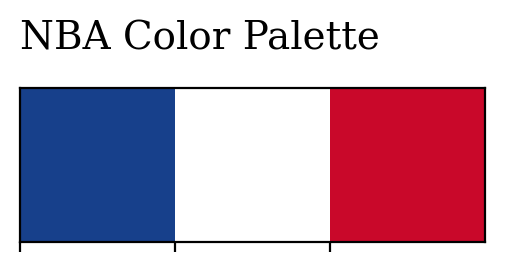

In [39]:
nba_colors = ['#17408B','#FFFFFF', '#C9082A']
nba_blue = nba_colors[0]
nba_red = nba_colors[-1]
sns.palplot(nba_colors)
plt.title("NBA Color Palette", loc="left", fontsize=14, fontname="serif", y=1.15)
plt.show()

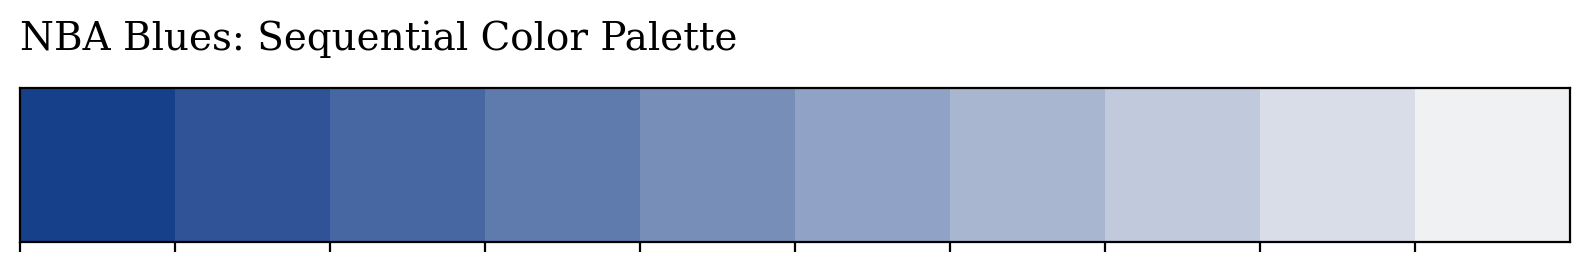

In [40]:
nba_blues = sns.light_palette(nba_blue, n_colors=10, reverse=True).as_hex()
sns.palplot(nba_blues)
plt.title("NBA Blues: Sequential Color Palette", loc="left", fontsize=14, fontname="serif", y=1.15)
plt.show()

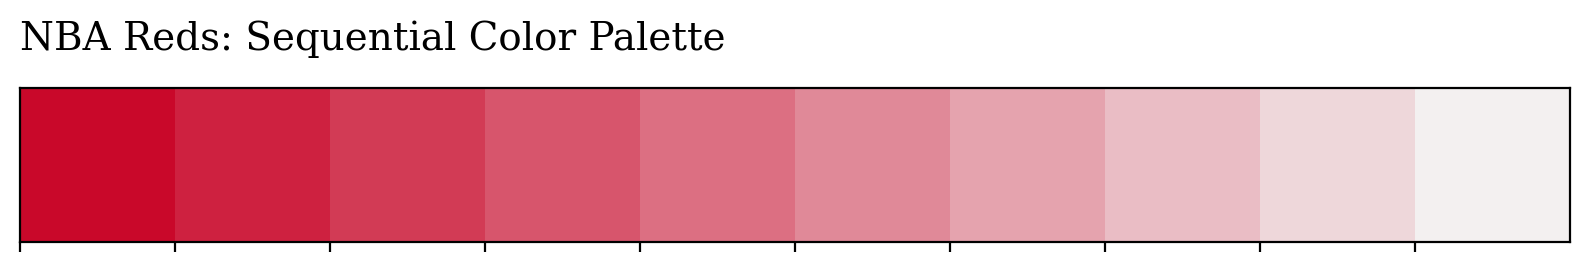

In [41]:
nba_reds = sns.light_palette(nba_red, n_colors=10, reverse=True).as_hex()
sns.palplot(nba_reds)
plt.title("NBA Reds: Sequential Color Palette", loc="left", fontsize=14, fontname="serif", y=1.15)
plt.show()

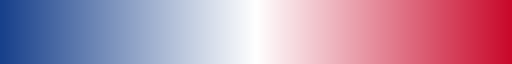

In [42]:
nba_cmap = sns.blend_palette(nba_colors, as_cmap=True)
nba_cmap

# Load in data for plotting

In [ ]:
df_nba_main = pd.read_csv("/content/drive/MyDrive/USF MSDS/593 EDA and Visualization/Final Project/data/nba_main_cleaned.csv")
# Looks like the Unnamed:0 column is a result of saving to csv with pandas. So we can drop it.
df_nba_main.drop("Unnamed: 0", axis=1, inplace=True)
df_nba_main

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,AST/TOV,STL/TOV,Team Official Name,Team Full Description,Team Total FG Attempts,Team Total FT Attempts,Team Total Turnovers,Team Total Minutes Played,Team Total Games Played,Usage Rate
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,...,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors),5367,2143,695.682322,16014,606,24.749677
1,14,1951-52,1951,Regular Season,76764,Joe Fulks,1610612744,PHW,61,1904,...,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors),5367,2143,695.682322,16014,606,30.477508
2,20,1951-52,1951,Regular Season,77853,Andy Phillip,1610612744,PHW,66,2933,...,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors),5367,2143,695.682322,16014,606,14.893612
3,50,1951-52,1951,Regular Season,77590,Ed Mikan,1610612744,PHW,66,1781,...,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors),5367,2143,695.682322,16014,606,17.817157
4,56,1951-52,1951,Regular Season,78115,George Senesky,1610612744,PHW,57,1925,...,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors),5367,2143,695.682322,16014,606,14.186344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33324,334,2022-23,2022,Regular Season,1629637,Jaxson Hayes,1610612740,NOP,47,610,...,1.10,0.65,New Orleans Pelicans,New Orleans Pelicans,7355,2001,1185.000000,20042,840,15.591447
33325,336,2022-23,2022,Regular Season,1630700,Dyson Daniels,1610612740,NOP,59,1042,...,2.35,0.75,New Orleans Pelicans,New Orleans Pelicans,7355,2001,1185.000000,20042,840,11.539960
33326,407,2022-23,2022,Regular Season,1630184,Kira Lewis Jr.,1610612740,NOP,25,235,...,2.30,1.00,New Orleans Pelicans,New Orleans Pelicans,7355,2001,1185.000000,20042,840,19.496967
33327,445,2022-23,2022,Regular Season,202066,Garrett Temple,1610612740,NOP,25,162,...,3.25,2.25,New Orleans Pelicans,New Orleans Pelicans,7355,2001,1185.000000,20042,840,13.332343


# Plot #1: Correlation Heatmap

In [ ]:
df_nba_main.dtypes

Rank                           int64
Year                          object
Season Start Year              int64
Season Type                   object
Player ID                      int64
Player                        object
Team ID                        int64
Team                          object
Games Played                   int64
Minutes Played                 int64
FG Made                        int64
FG Attempts                    int64
FG %                         float64
3-Pt FG Made                 float64
3-Pt FG Attempts             float64
3-Pt FG %                    float64
FT Made                        int64
FT Attempts                    int64
FT %                         float64
Offensive Rebounds           float64
Defensive Rebounds           float64
Rebounds                       int64
Assists                        int64
Steals                       float64
Blocks                       float64
Turnovers                    float64
Personal Fouls                 int64
P

In [ ]:
df_nba_main.columns

Index(['Rank', 'Year', 'Season Start Year', 'Season Type', 'Player ID',
       'Player', 'Team ID', 'Team', 'Games Played', 'Minutes Played',
       'FG Made', 'FG Attempts', 'FG %', '3-Pt FG Made', '3-Pt FG Attempts',
       '3-Pt FG %', 'FT Made', 'FT Attempts', 'FT %', 'Offensive Rebounds',
       'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'Personal Fouls', 'Points Scored', 'Efficiency', 'AST/TOV',
       'STL/TOV', 'Team Official Name', 'Team Full Description',
       'Team Total FG Attempts', 'Team Total FT Attempts',
       'Team Total Turnovers', 'Team Total Minutes Played',
       'Team Total Games Played', 'Usage Rate'],
      dtype='object')

In [ ]:
df_numeric_cols =  df_nba_main[['Rank', 'Games Played',
       'Minutes Played', 'FG Made', 'FG Attempts', 'FG %', '3-Pt FG Made',
       '3-Pt FG Attempts', '3-Pt FG %', 'FT Made', 'FT Attempts', 'FT %',
       'Offensive Rebounds', 'Defensive Rebounds', 'Rebounds', 'Assists',
       'Steals', 'Blocks', 'Turnovers', 'Personal Fouls', 'Points Scored',
       'Efficiency', 'AST/TOV', 'STL/TOV', 'Usage Rate']].copy()
df_numeric_cols.head()

,Rank,Games Played,Minutes Played,FG Made,FG Attempts,FG %,3-Pt FG Made,3-Pt FG Attempts,3-Pt FG %,FT Made,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficiency,AST/TOV,STL/TOV,Usage Rate
0,1,66,2939,548,1222,0.448,NaN,NaN,NaN,578,...,170,NaN,NaN,57.973527,250,1674,1786,NaN,NaN,24.749677
1,14,61,1904,336,1078,0.312,NaN,NaN,NaN,250,...,123,NaN,NaN,57.973527,255,922,618,NaN,NaN,30.477508
2,20,66,2933,279,762,0.366,NaN,NaN,NaN,232,...,539,NaN,NaN,57.973527,218,790,1204,NaN,NaN,14.893612
3,50,66,1781,202,571,0.354,NaN,NaN,NaN,116,...,87,NaN,NaN,57.973527,252,520,698,NaN,NaN,17.817157
4,56,57,1925,164,454,0.361,NaN,NaN,NaN,146,...,280,NaN,NaN,57.973527,123,474,648,NaN,NaN,14.186344


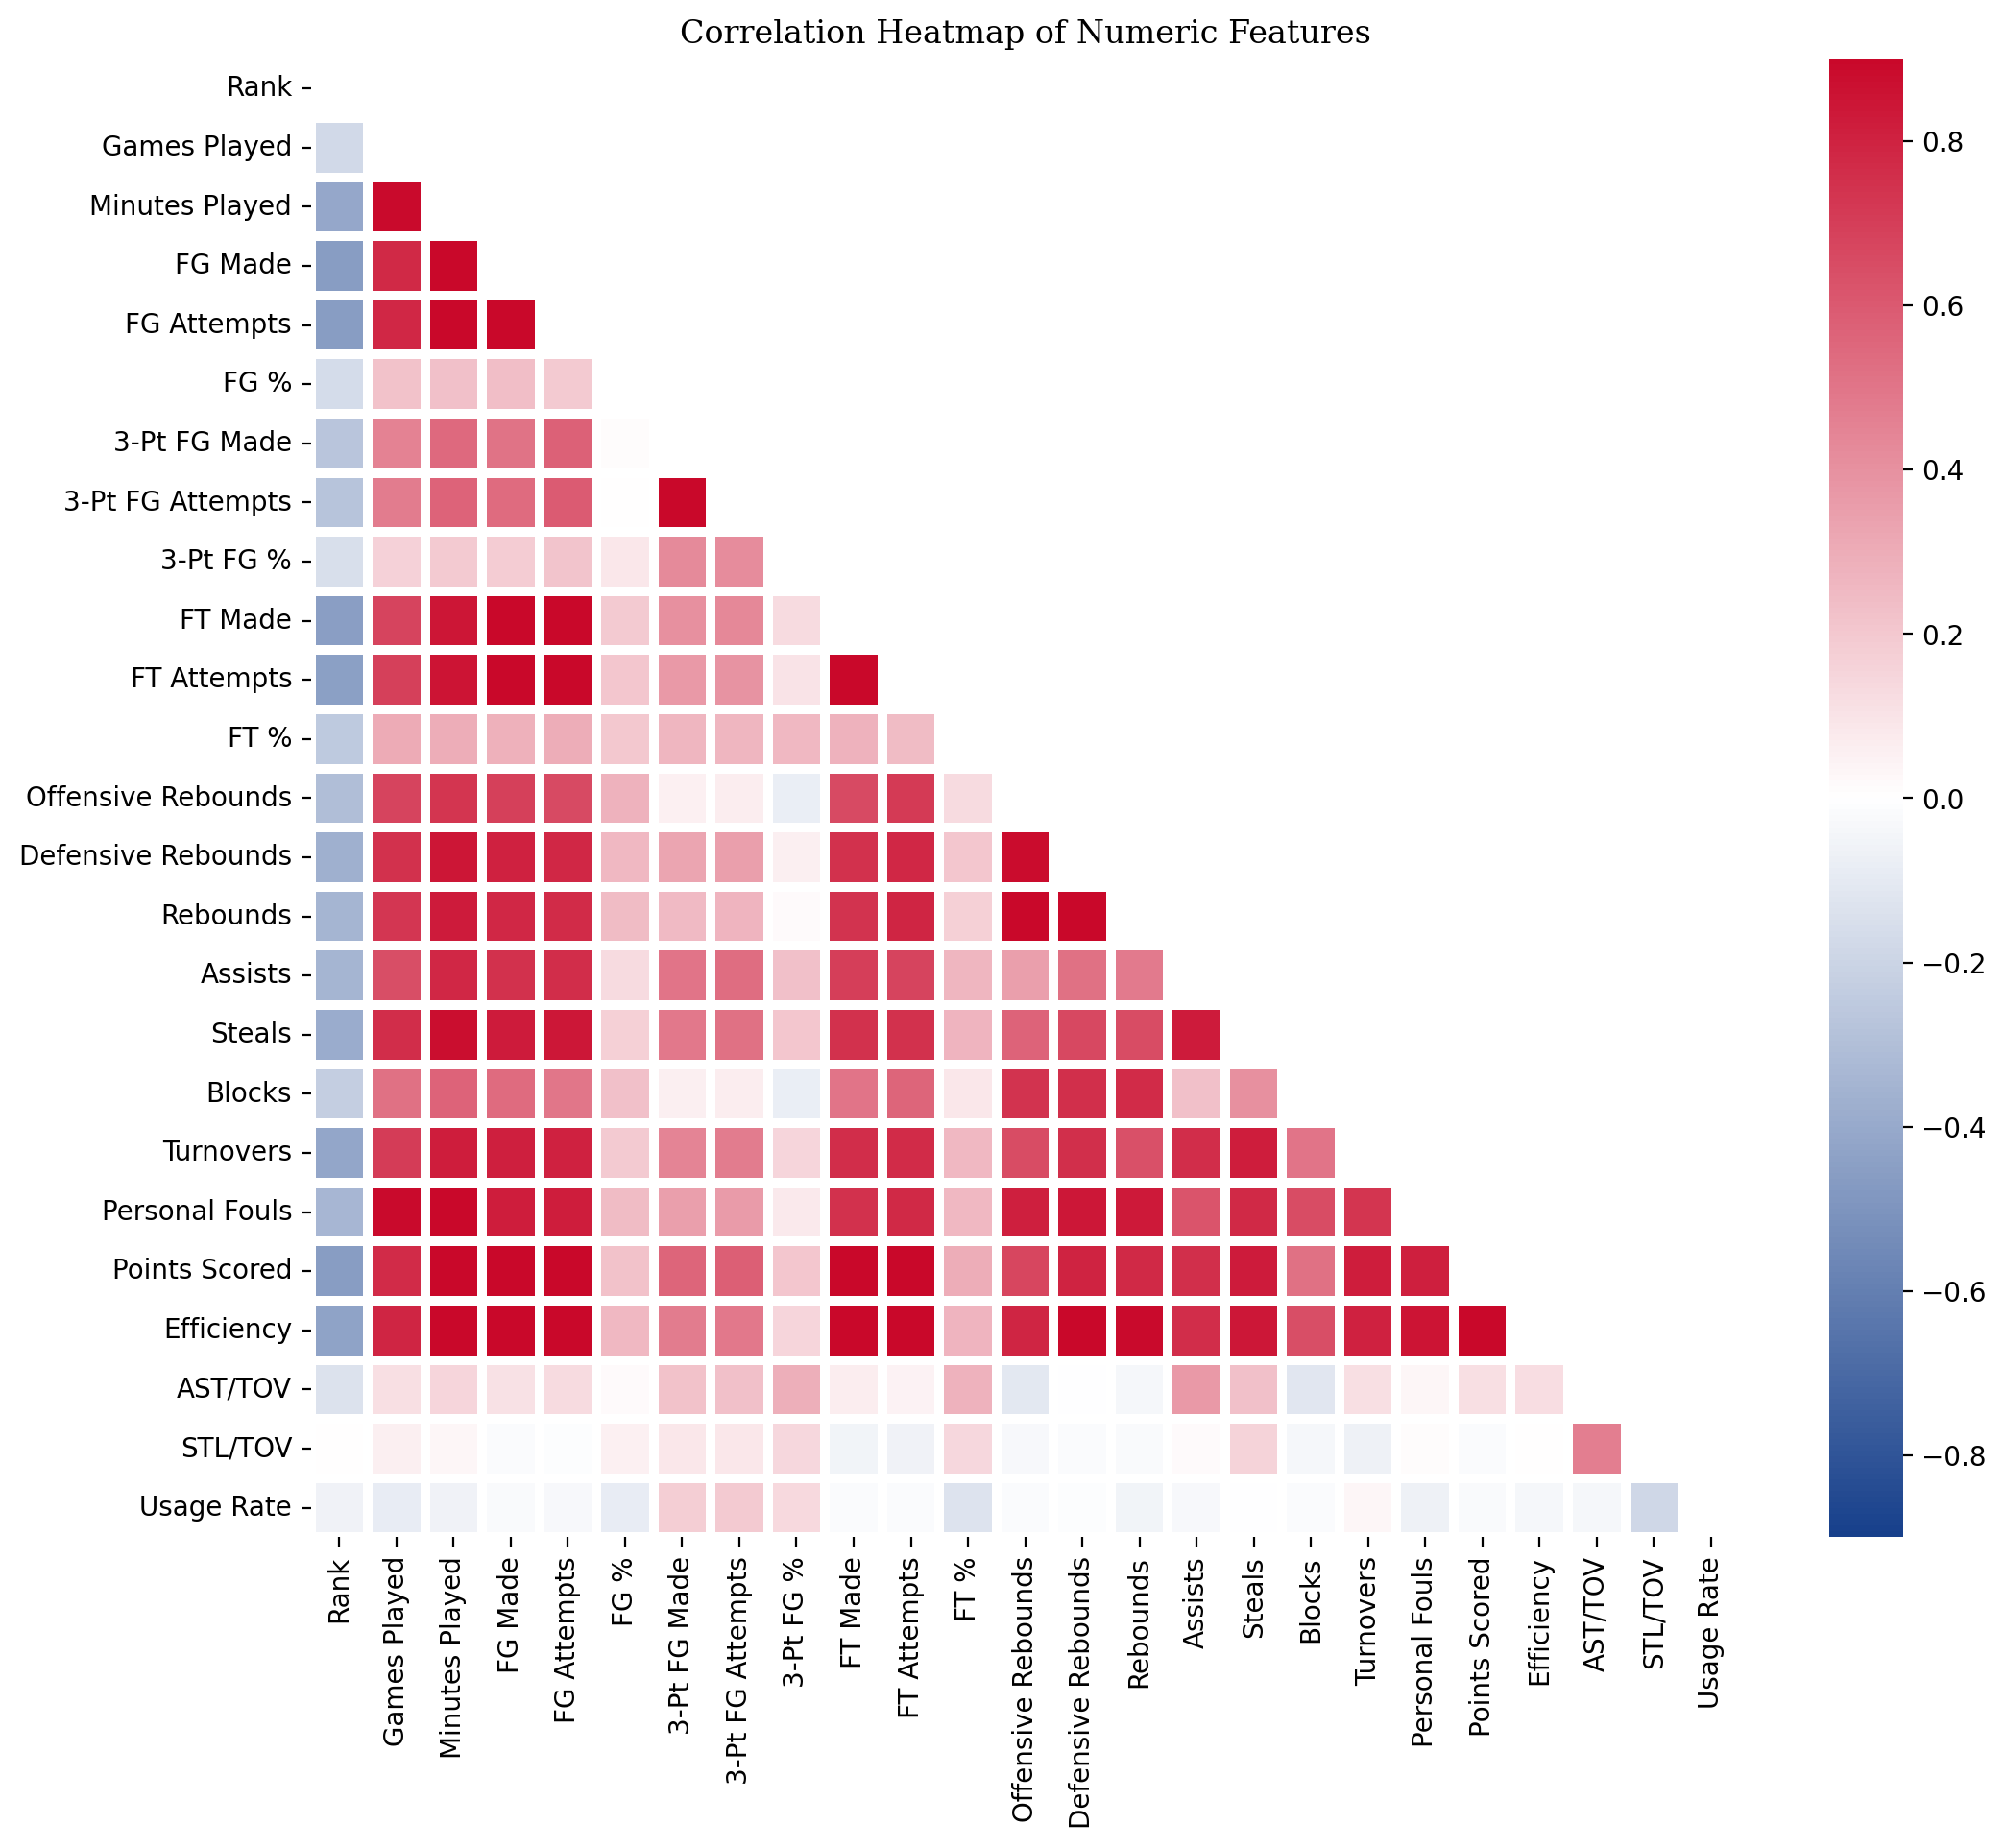

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))

# create mask to only show lower triangle
mask = np.triu(np.ones_like(df_numeric_cols.corr()))
ax = sns.heatmap(df_numeric_cols.corr(), linewidths=3, cmap=nba_cmap, mask=mask, vmin = -0.9, vmax = 0.9)
ax.set_title("Correlation Heatmap of Numeric Features", fontname="serif")

plt.show()

## Plot 2: Scatter Plot of Average Player Effectiveness
Efficiency measures the overall value a player brings because is a measure of not only how much they contribute to the team, but the proportion of how much they succeed out of all their attempts.
> In professional basketball, the most commonly used statistical benchmark for comparing the overall value of players is called efficiency. It is a composite basketball statistic that is derived from basic individual statistics: points, rebounds, assists, steals, blocks, turnovers, and shot attempts. In theory, efficiency accounts for both a player's offensive contributions (points and assists) and their defensive contributions (steals and blocks)

To see how well players do relative to the rest of their teams, we'll plot a scatter plot of Usage(how much of the court they have compared to their teammates) vs. Efficiency(how much they succeed out of their own total attempts). We'll visualize and compare the best players according to these metrics.
<br/><br/>
Although there are so many records, we'll have to look at the records most relevant to our area of interest, so we'll need to narrow the dataset in the following ways:
* Because performance matters the most during the Playoffs (which determine the season's/year's best team), we'll only include records for the Playoffs seasons.
* Because players need time to make an impact on a game, we'll include players who've played for at least 12 minutes/1 quarter for the whole season.
  * This helps us avoid confounding records for players who had very high efficiency because they only played for a short amount of time (e.g. they succeeded in 80% of their attempts but played for only 1 minute,).
* We'll narrow our focus to the top 100 performing players.

In [54]:
df_nba_playoffs = df_nba_main[(df_nba_main['Season Type']=='Playoffs') & (df_nba_main['Minutes Played']>=12)].copy()
df_nba_playoffs

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,AST/TOV,STL/TOV,Team Official Name,Team Full Description,Team Total FG Attempts,Team Total FT Attempts,Team Total Turnovers,Team Total Minutes Played,Team Total Games Played,Usage Rate
12,20,1951-52,1951,Playoffs,76056,Paul Arizin,1610612744,PHW,3,120,...,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors),208,117,579.735269,720,30,17.944410
13,30,1951-52,1951,Playoffs,78115,George Senesky,1610612744,PHW,3,120,...,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors),208,117,579.735269,720,30,13.700446
14,33,1951-52,1951,Playoffs,77853,Andy Phillip,1610612744,PHW,3,122,...,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors),208,117,579.735269,720,30,12.311294
15,44,1951-52,1951,Playoffs,76779,Vern Gardner,1610612744,PHW,3,77,...,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors),208,117,579.735269,720,30,18.231546
16,49,1951-52,1951,Playoffs,77590,Ed Mikan,1610612744,PHW,3,74,...,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors),208,117,579.735269,720,30,19.258190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33307,110,2021-22,2021,Playoffs,1630631,Jose Alvarado,1610612740,NOP,6,117,...,1.29,1.00,New Orleans Pelicans,New Orleans Pelicans,506,173,83.000000,1441,62,16.932237
33308,123,2021-22,2021,Playoffs,1629637,Jaxson Hayes,1610612740,NOP,6,83,...,0.25,0.00,New Orleans Pelicans,New Orleans Pelicans,506,173,83.000000,1441,62,17.666326
33309,127,2021-22,2021,Playoffs,1630530,Trey Murphy III,1610612740,NOP,6,120,...,3.00,3.00,New Orleans Pelicans,New Orleans Pelicans,506,173,83.000000,1441,62,9.099411
33310,139,2021-22,2021,Playoffs,1628984,Devonte' Graham,1610612740,NOP,6,60,...,1.00,0.25,New Orleans Pelicans,New Orleans Pelicans,506,173,83.000000,1441,62,18.429917


Now, let's group by each player and get their average statistics:

In [55]:
df_avg_eff_usage = df_nba_playoffs.groupby('Player').mean().sort_values(by=['Efficiency'], ascending=False)[['Efficiency','Usage Rate','Games Played','Minutes Played']].copy()
df_avg_eff_usage

<ipython-input-55-c446c0837a99>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg_eff_usage = df_nba_playoffs.groupby('Player').mean().sort_values(by=['Efficiency'], ascending=False)[['Efficiency','Usage Rate','Games Played','Minutes Played']].copy()


,Efficiency,Usage Rate,Games Played,Minutes Played
Player,,,,
LeBron James,547.437500,32.015358,17.625000,728.375000
Nikola Jokic,479.400000,31.848568,13.600000,511.000000
Wilt Chamberlain,463.076923,16.925796,12.307692,581.461538
Bill Russell,444.307692,13.608465,12.692308,576.692308
Magic Johnson,443.923077,21.474589,14.615385,579.846154
...,...,...,...,...
Troy Williams,-3.000000,27.691146,5.000000,19.000000
Kostas Papanikolaou,-4.000000,19.763023,8.000000,21.000000
Ralph Simpson,-5.000000,60.165434,2.000000,17.000000


In [56]:
s_player_last_active = df_nba_playoffs.groupby('Player').max()['Season Start Year']+1 # we add one year b/c season ends the next year after season start
s_player_last_active

Player
A.C. Green            2001
AJ Price              2011
Aaron Brooks          2015
Aaron Gordon          2023
Aaron Gray            2011
                      ... 
Zeljko Rebraca        2006
Zelmo Beaty           1969
Ziaire Williams       2023
Zoran Planinic        2004
Zydrunas Ilgauskas    2011
Name: Season Start Year, Length: 2279, dtype: int64

In [57]:
df_avg_eff_usage['Year Last Played'] = s_player_last_active
df_avg_eff_usage

,Efficiency,Usage Rate,Games Played,Minutes Played,Year Last Played
Player,,,,,
LeBron James,547.437500,32.015358,17.625000,728.375000,2023
Nikola Jokic,479.400000,31.848568,13.600000,511.000000,2023
Wilt Chamberlain,463.076923,16.925796,12.307692,581.461538,1973
Bill Russell,444.307692,13.608465,12.692308,576.692308,1969
Magic Johnson,443.923077,21.474589,14.615385,579.846154,1996
...,...,...,...,...,...
Troy Williams,-3.000000,27.691146,5.000000,19.000000,2017
Kostas Papanikolaou,-4.000000,19.763023,8.000000,21.000000,2015
Ralph Simpson,-5.000000,60.165434,2.000000,17.000000,1977


In [58]:
df_top_100_players = df_avg_eff_usage[:100].copy()
df_top_100_players.sort_values(by=['Efficiency'],ascending=False).head(20)

,Efficiency,Usage Rate,Games Played,Minutes Played,Year Last Played
Player,,,,,
LeBron James,547.437500,32.015358,17.625000,728.375000,2023
Nikola Jokic,479.400000,31.848568,13.600000,511.000000,2023
Wilt Chamberlain,463.076923,16.925796,12.307692,581.461538,1973
Bill Russell,444.307692,13.608465,12.692308,576.692308,1969
Magic Johnson,443.923077,21.474589,14.615385,579.846154,1996
Jamal Murray,437.000000,27.487133,17.666667,686.666667,2023
Michael Jordan,425.923077,35.724057,13.769231,574.923077,1998
Stephen Curry,417.222222,29.513551,16.333333,610.222222,2023
Larry Bird,402.833333,24.462918,13.666667,573.833333,1992


Now let's do some plotting!

In [59]:
mvp_players = df_champions.loc[df_champions['Finals MVP'].notnull()]['Finals MVP'].values
mvp_players

array(['Jerry West', 'Willis Reed', 'Lew Alcindor', 'Wilt Chamberlain',
       'Willis Reed', 'John Havlicek', 'Rick Barry', 'Jo Jo White',
       'Bill Walton', 'Wes Unseld', 'Dennis Johnson', 'Magic Johnson',
       'Cedric Maxwell', 'Magic Johnson', 'Moses Malone', 'Larry Bird',
       'Kareem Abdul-Jabbar', 'Larry Bird', 'Magic Johnson',
       'James Worthy', 'Joe Dumars', 'Isiah Thomas', 'Michael Jordan',
       'Michael Jordan', 'Michael Jordan', 'Hakeem Olajuwon',
       'Hakeem Olajuwon', 'Michael Jordan', 'Michael Jordan',
       'Michael Jordan', 'Tim Duncan', "Shaquille O'Neal",
       "Shaquille O'Neal", "Shaquille O'Neal", 'Tim Duncan',
       'Chauncey Billups', 'Tim Duncan', 'Dwyane Wade', 'Tony Parker',
       'Paul Pierce', 'Kobe Bryant', 'Kobe Bryant', 'Dirk Nowitzki',
       'LeBron James', 'LeBron James', 'Kawhi Leonard', 'Andre Iguodala',
       'LeBron James', 'Kevin Durant', 'Kevin Durant', 'Kawhi Leonard',
       'LeBron James', 'Giannis Antetokounmpo', 'Stephe

In [60]:
# add missing mvps
mvp_players = np.append(mvp_players, 'Julius Erving')

In [61]:
df_top_100_players['MVP At Least Once?'] = df_top_100_players.index.isin(mvp_players)
df_top_100_players.head()

,Efficiency,Usage Rate,Games Played,Minutes Played,Year Last Played,MVP At Least Once?
Player,,,,,,
LeBron James,547.437500,32.015358,17.625000,728.375000,2023,True
Nikola Jokic,479.400000,31.848568,13.600000,511.000000,2023,False
Wilt Chamberlain,463.076923,16.925796,12.307692,581.461538,1973,True
Bill Russell,444.307692,13.608465,12.692308,576.692308,1969,False
Magic Johnson,443.923077,21.474589,14.615385,579.846154,1996,True


In [62]:
median_year = df_top_100_players['Year Last Played'].median()
df_top_100_players['Color'] = np.where(df_top_100_players['MVP At Least Once?'],
                                       np.where(df_top_100_players['Year Last Played'] >= median_year, nba_red, nba_blues[3]),
                                       'gray')
df_top_100_players['Alpha'] = np.where(df_top_100_players['MVP At Least Once?'], 0.8, 0.3)
df_top_100_players['Size'] = np.where(df_top_100_players['MVP At Least Once?'], 40, 20)
df_top_100_players.head()

,Efficiency,Usage Rate,Games Played,Minutes Played,Year Last Played,MVP At Least Once?,Color,Alpha,Size
Player,,,,,,,,,
LeBron James,547.437500,32.015358,17.625000,728.375000,2023,True,#C9082A,0.8,40
Nikola Jokic,479.400000,31.848568,13.600000,511.000000,2023,False,gray,0.3,20
Wilt Chamberlain,463.076923,16.925796,12.307692,581.461538,1973,True,#5f7bae,0.8,40
Bill Russell,444.307692,13.608465,12.692308,576.692308,1969,False,gray,0.3,20
Magic Johnson,443.923077,21.474589,14.615385,579.846154,1996,True,#5f7bae,0.8,40


In [63]:
# usage vs. efficiency plot data
old_mvps = df_top_100_players[(df_top_100_players['MVP At Least Once?'])&(df_top_100_players['Year Last Played'] <= median_year)]
new_mvps = df_top_100_players[(df_top_100_players['MVP At Least Once?'])&(df_top_100_players['Year Last Played'] > median_year)]
other_players = df_top_100_players[~(df_top_100_players['MVP At Least Once?'])]

x_new_mvp, y_new_mvp = new_mvps['Usage Rate'], new_mvps['Efficiency']
x_old_mvp, y_old_mvp = old_mvps['Usage Rate'], old_mvps['Efficiency']
x_other, y_other = other_players['Usage Rate'], other_players['Efficiency']
x_all, y_all = df_top_100_players['Usage Rate'], df_top_100_players['Efficiency']

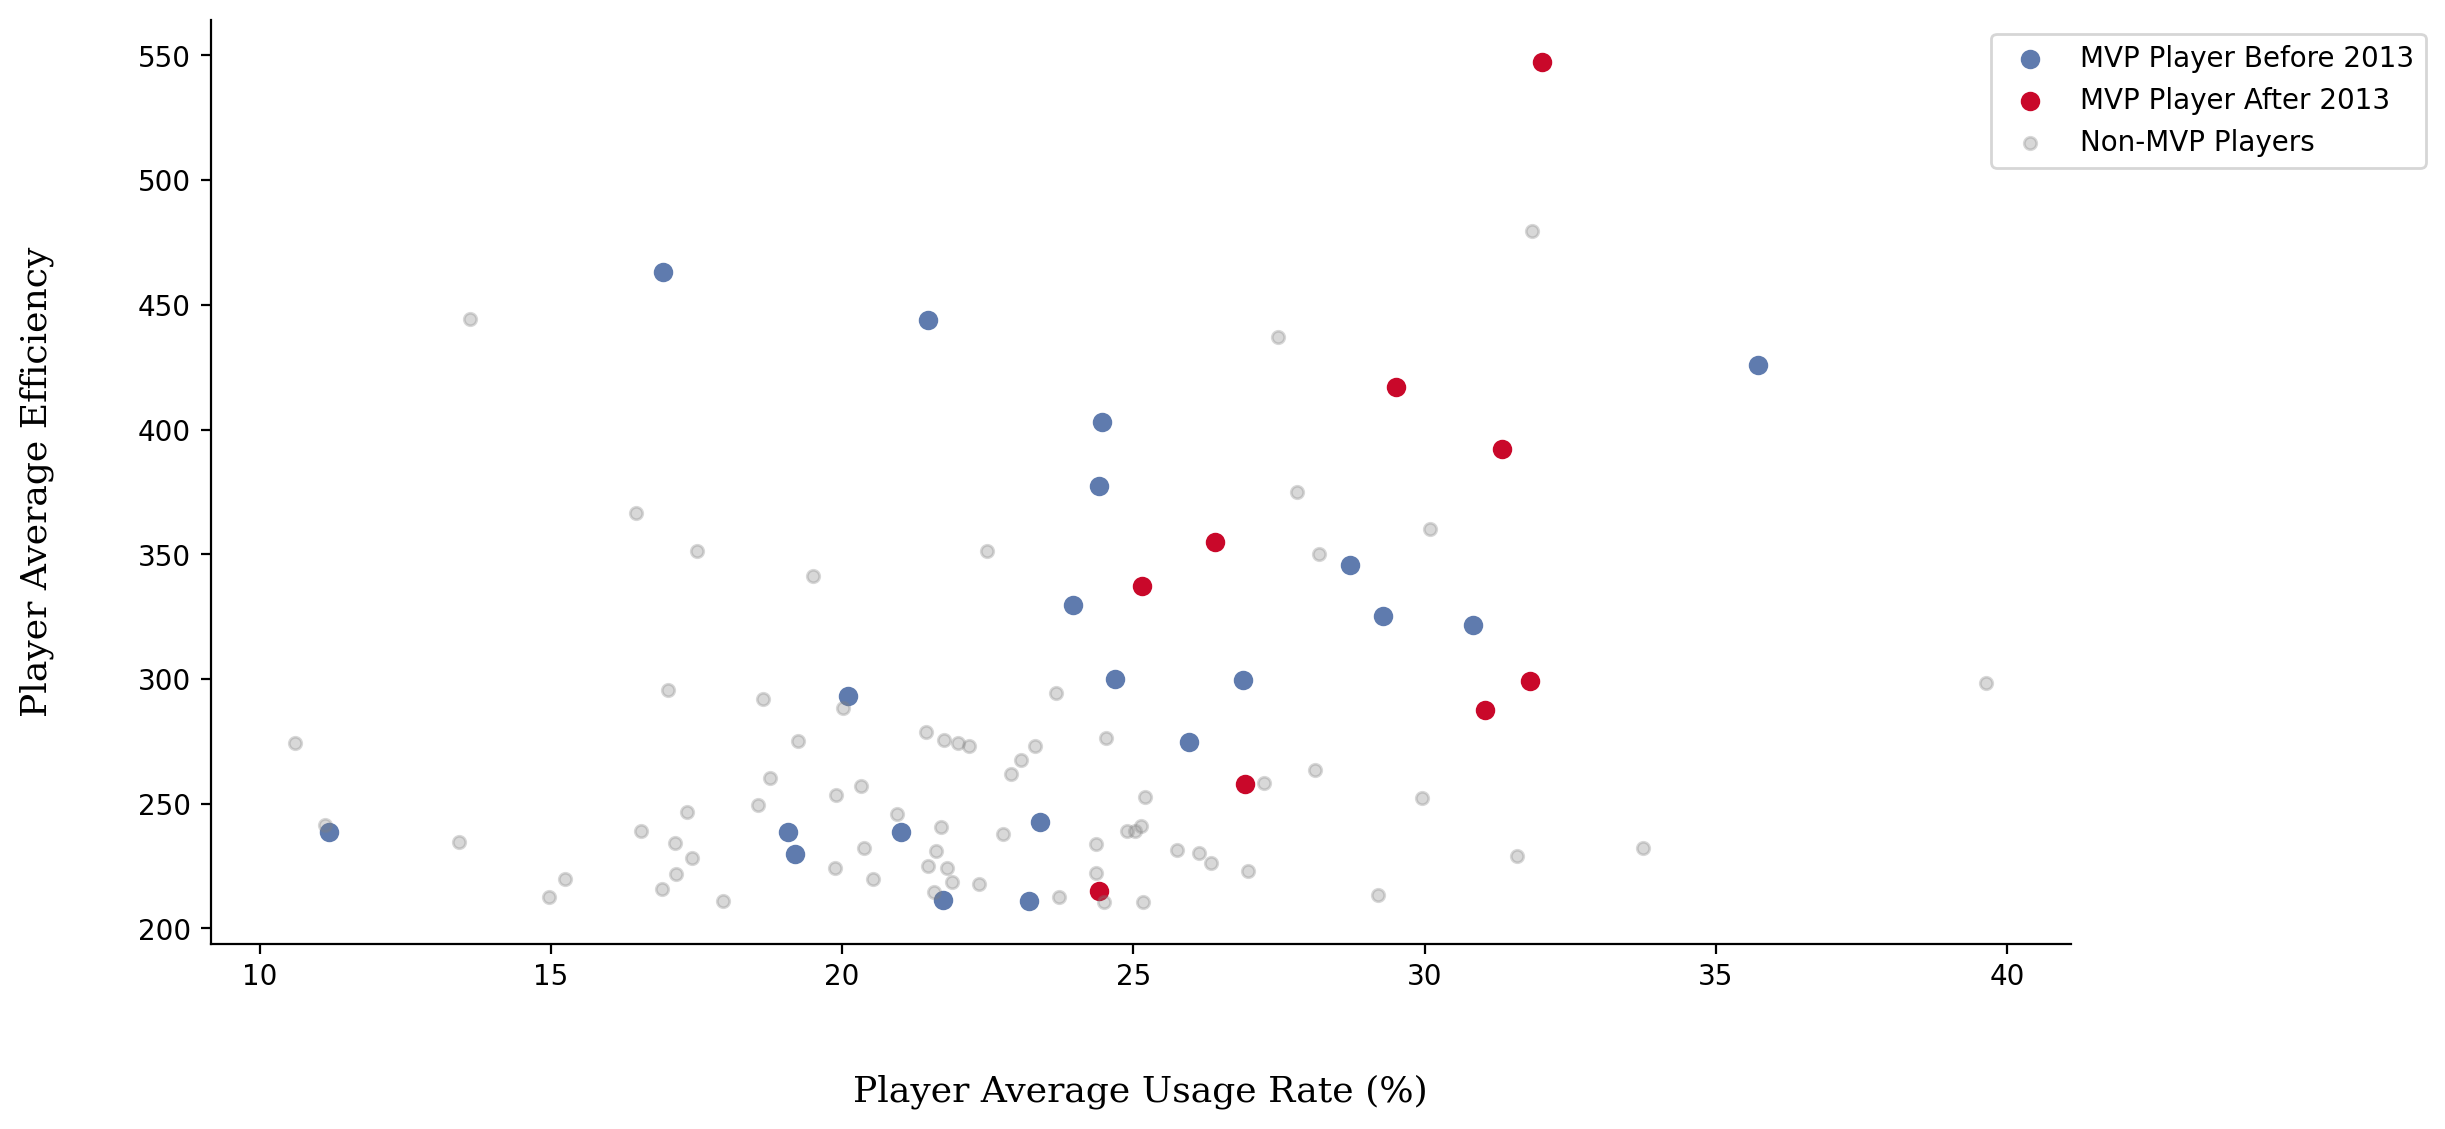

In [64]:
fig, ax = plt.subplots(figsize=(12, 6))

# draw points
ax.scatter(x_old_mvp, y_old_mvp, color=nba_blues[3], label="MVP Player Before 2013")
ax.scatter(x_new_mvp, y_new_mvp, color=nba_red, label="MVP Player After 2013")
ax.scatter(x_other, y_other, color='gray', s=20, label="Non-MVP Players", alpha=0.3)

# legend
ax.legend(loc="upper left", bbox_to_anchor=(0.95,1))

# title and axis labels
# ax.set_title("Top 100 Players with Highest Average Efficiency and Usage", fontname="serif",pad=30, fontsize=16)
ax.set_xlabel("Player Average Usage Rate (%)", labelpad=30, fontsize=13, fontname="serif")
ax.set_ylabel("Player Average Efficiency", labelpad=30, fontsize=13, fontname="serif")

# hide frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

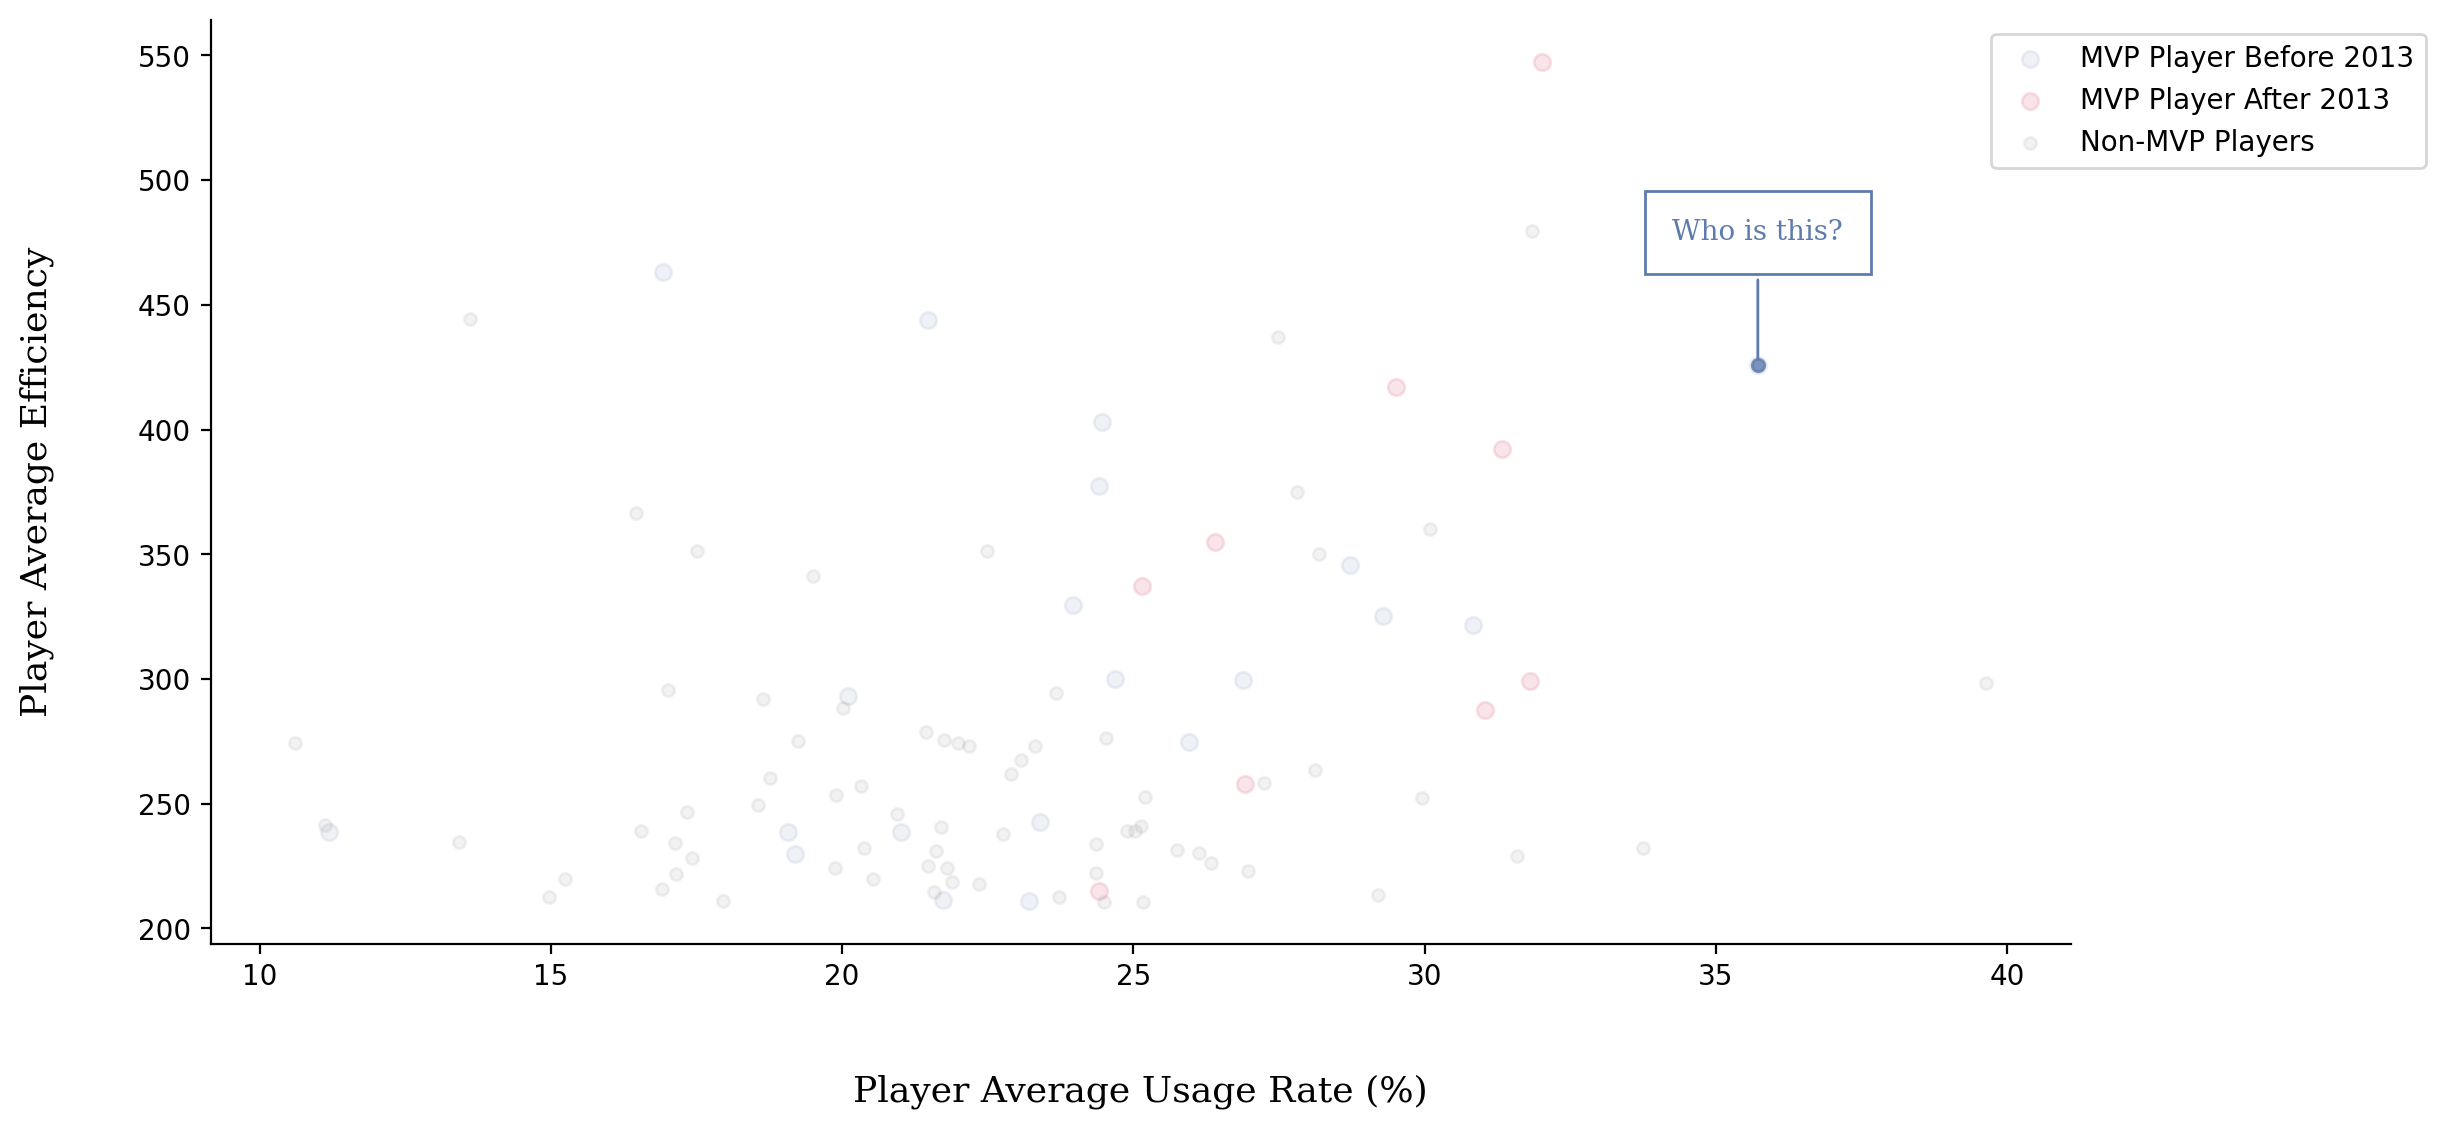

In [75]:
michael_jordan = df_top_100_players.loc['Michael Jordan']
x_michael_jordan = michael_jordan['Usage Rate']
y_michael_jordan = michael_jordan['Efficiency']

fig, ax = plt.subplots(figsize=(12, 6))

# draw points
ax.scatter(x_old_mvp, y_old_mvp, color=nba_blues[3], label="MVP Player Before 2013", alpha=0.1)
ax.scatter(x_new_mvp, y_new_mvp, color=nba_red, label="MVP Player After 2013", alpha=0.1)
ax.scatter(x_other, y_other, color='gray', s=20, alpha=0.1, label="Non-MVP Players")
ax.scatter(x_michael_jordan, y_michael_jordan, color=nba_blues[3], s=20, alpha=0.8)


# legend
ax.legend(loc="upper left", bbox_to_anchor=(0.95,1))

# title and axis labels
# ax.set_title("Top 100 Players with Highest Average Efficiency and Usage", fontname="serif",pad=30, fontsize=16)
ax.set_xlabel("Player Average Usage Rate (%)", labelpad=30, fontsize=13, fontname="serif")
ax.set_ylabel("Player Average Efficiency", labelpad=30, fontsize=13, fontname="serif")

# hide frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Michael Jordan
ax.annotate("Who is this?", xy=(x_michael_jordan, y_michael_jordan),
            xytext=(x_michael_jordan, y_michael_jordan+50),
            bbox=dict(boxstyle="square", fc="w",pad=1, color=michael_jordan['Color']),
            ha="center", fontname="serif", fontsize=10, color=michael_jordan['Color'],
            arrowprops=dict(arrowstyle="-",color=michael_jordan['Color']))
plt.show()

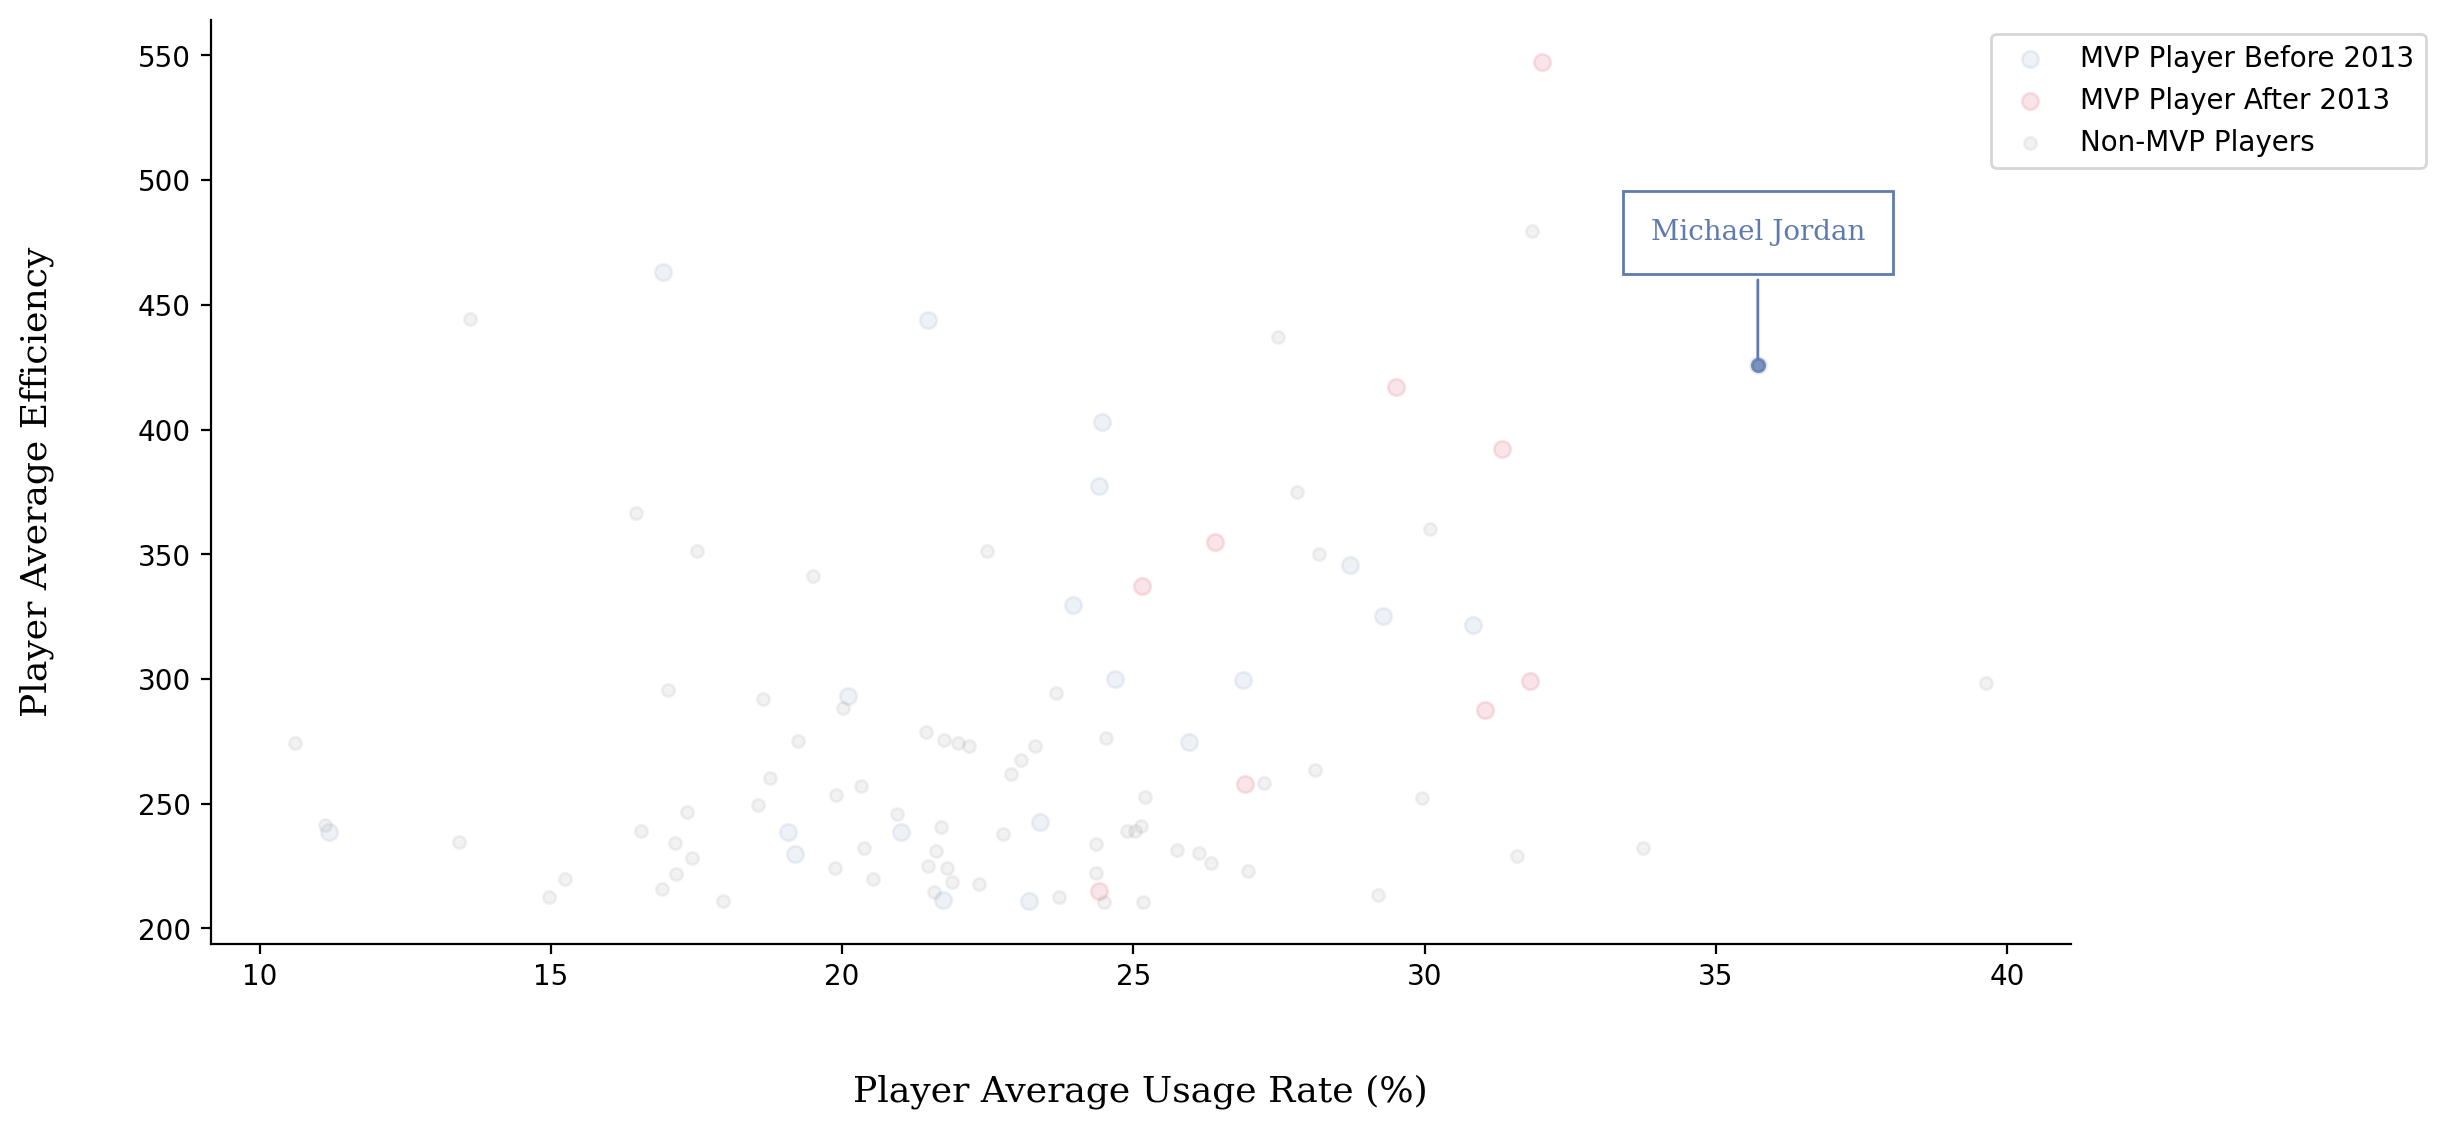

In [74]:
fig, ax = plt.subplots(figsize=(12, 6))

# draw points
ax.scatter(x_old_mvp, y_old_mvp, color=nba_blues[3], label="MVP Player Before 2013", alpha=0.1)
ax.scatter(x_new_mvp, y_new_mvp, color=nba_red, label="MVP Player After 2013", alpha=0.1)
ax.scatter(x_other, y_other, color='gray', s=20, alpha=0.1, label="Non-MVP Players")
ax.scatter(x_michael_jordan, y_michael_jordan, color=nba_blues[3], s=20, alpha=0.8)


# legend
ax.legend(loc="upper left", bbox_to_anchor=(0.95,1))

# title and axis labels
# ax.set_title("Top 100 Players with Highest Average Efficiency and Usage", fontname="serif",pad=30, fontsize=16)
ax.set_xlabel("Player Average Usage Rate (%)", labelpad=30, fontsize=13, fontname="serif")
ax.set_ylabel("Player Average Efficiency", labelpad=30, fontsize=13, fontname="serif")

# hide frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Michael Jordan
ax.annotate("Michael Jordan", xy=(x_michael_jordan, y_michael_jordan),
            xytext=(x_michael_jordan, y_michael_jordan+50),
            bbox=dict(boxstyle="square", fc="w",pad=1, color=michael_jordan['Color']),
            ha="center", fontname="serif", fontsize=10, color=michael_jordan['Color'],
            arrowprops=dict(arrowstyle="-",color=michael_jordan['Color']))


plt.show()

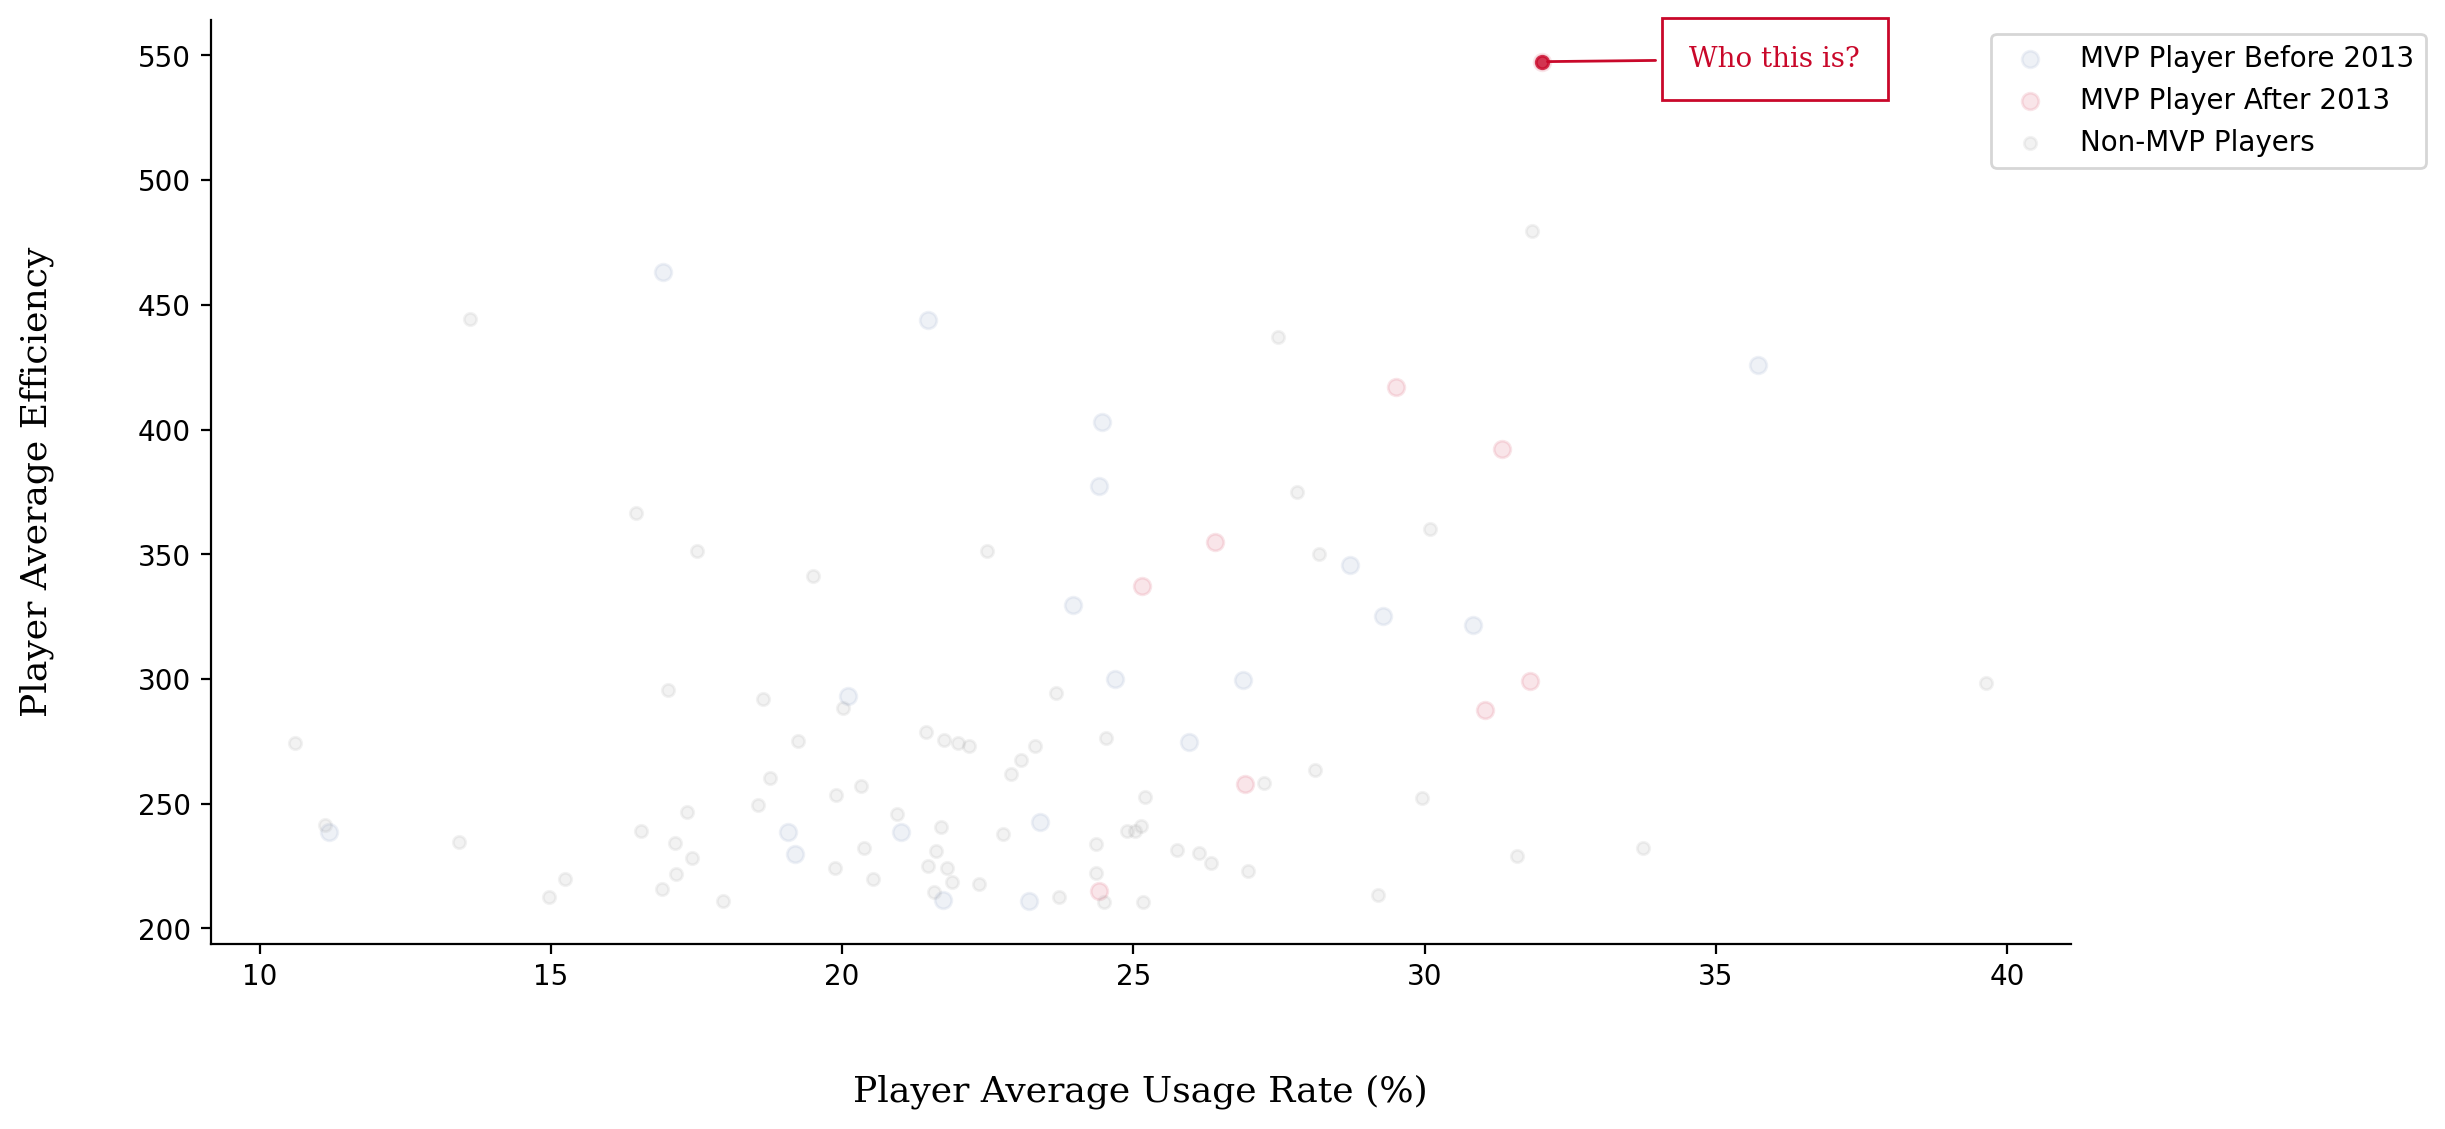

In [76]:
x_lebron_james = df_top_100_players.loc['LeBron James']['Usage Rate']
y_lebron_james = df_top_100_players.loc['LeBron James']['Efficiency']

fig, ax = plt.subplots(figsize=(12, 6))

# draw points
ax.scatter(x_old_mvp, y_old_mvp, color=nba_blues[3], label="MVP Player Before 2013", alpha=0.1)
ax.scatter(x_new_mvp, y_new_mvp, color=nba_red, label="MVP Player After 2013", alpha=0.1)
ax.scatter(x_other, y_other, color='gray', s=20, label="Non-MVP Players", alpha=0.1)
ax.scatter(x_lebron_james, y_lebron_james, color=nba_red, s=20, alpha=0.8)


# legend
ax.legend(loc="upper left", bbox_to_anchor=(0.95,1))

# title and axis labels
# ax.set_title("Top 100 Players with Highest Average Efficiency and Usage", fontname="serif",pad=30, fontsize=16)
ax.set_xlabel("Player Average Usage Rate (%)", labelpad=30, fontsize=13, fontname="serif")
ax.set_ylabel("Player Average Efficiency", labelpad=30, fontsize=13, fontname="serif")

# hide frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# LeBron James
ax.annotate("Who this is?", xy=(x_lebron_james, y_lebron_james),
            xytext=(x_lebron_james+4, y_lebron_james-2),
            bbox=dict(boxstyle="square", fc="w",pad=1, color=lebron_james['Color']),
            ha="center", fontname="serif", fontsize=10, color=lebron_james['Color'],
            arrowprops=dict(arrowstyle="-",color=lebron_james['Color']))


plt.show()

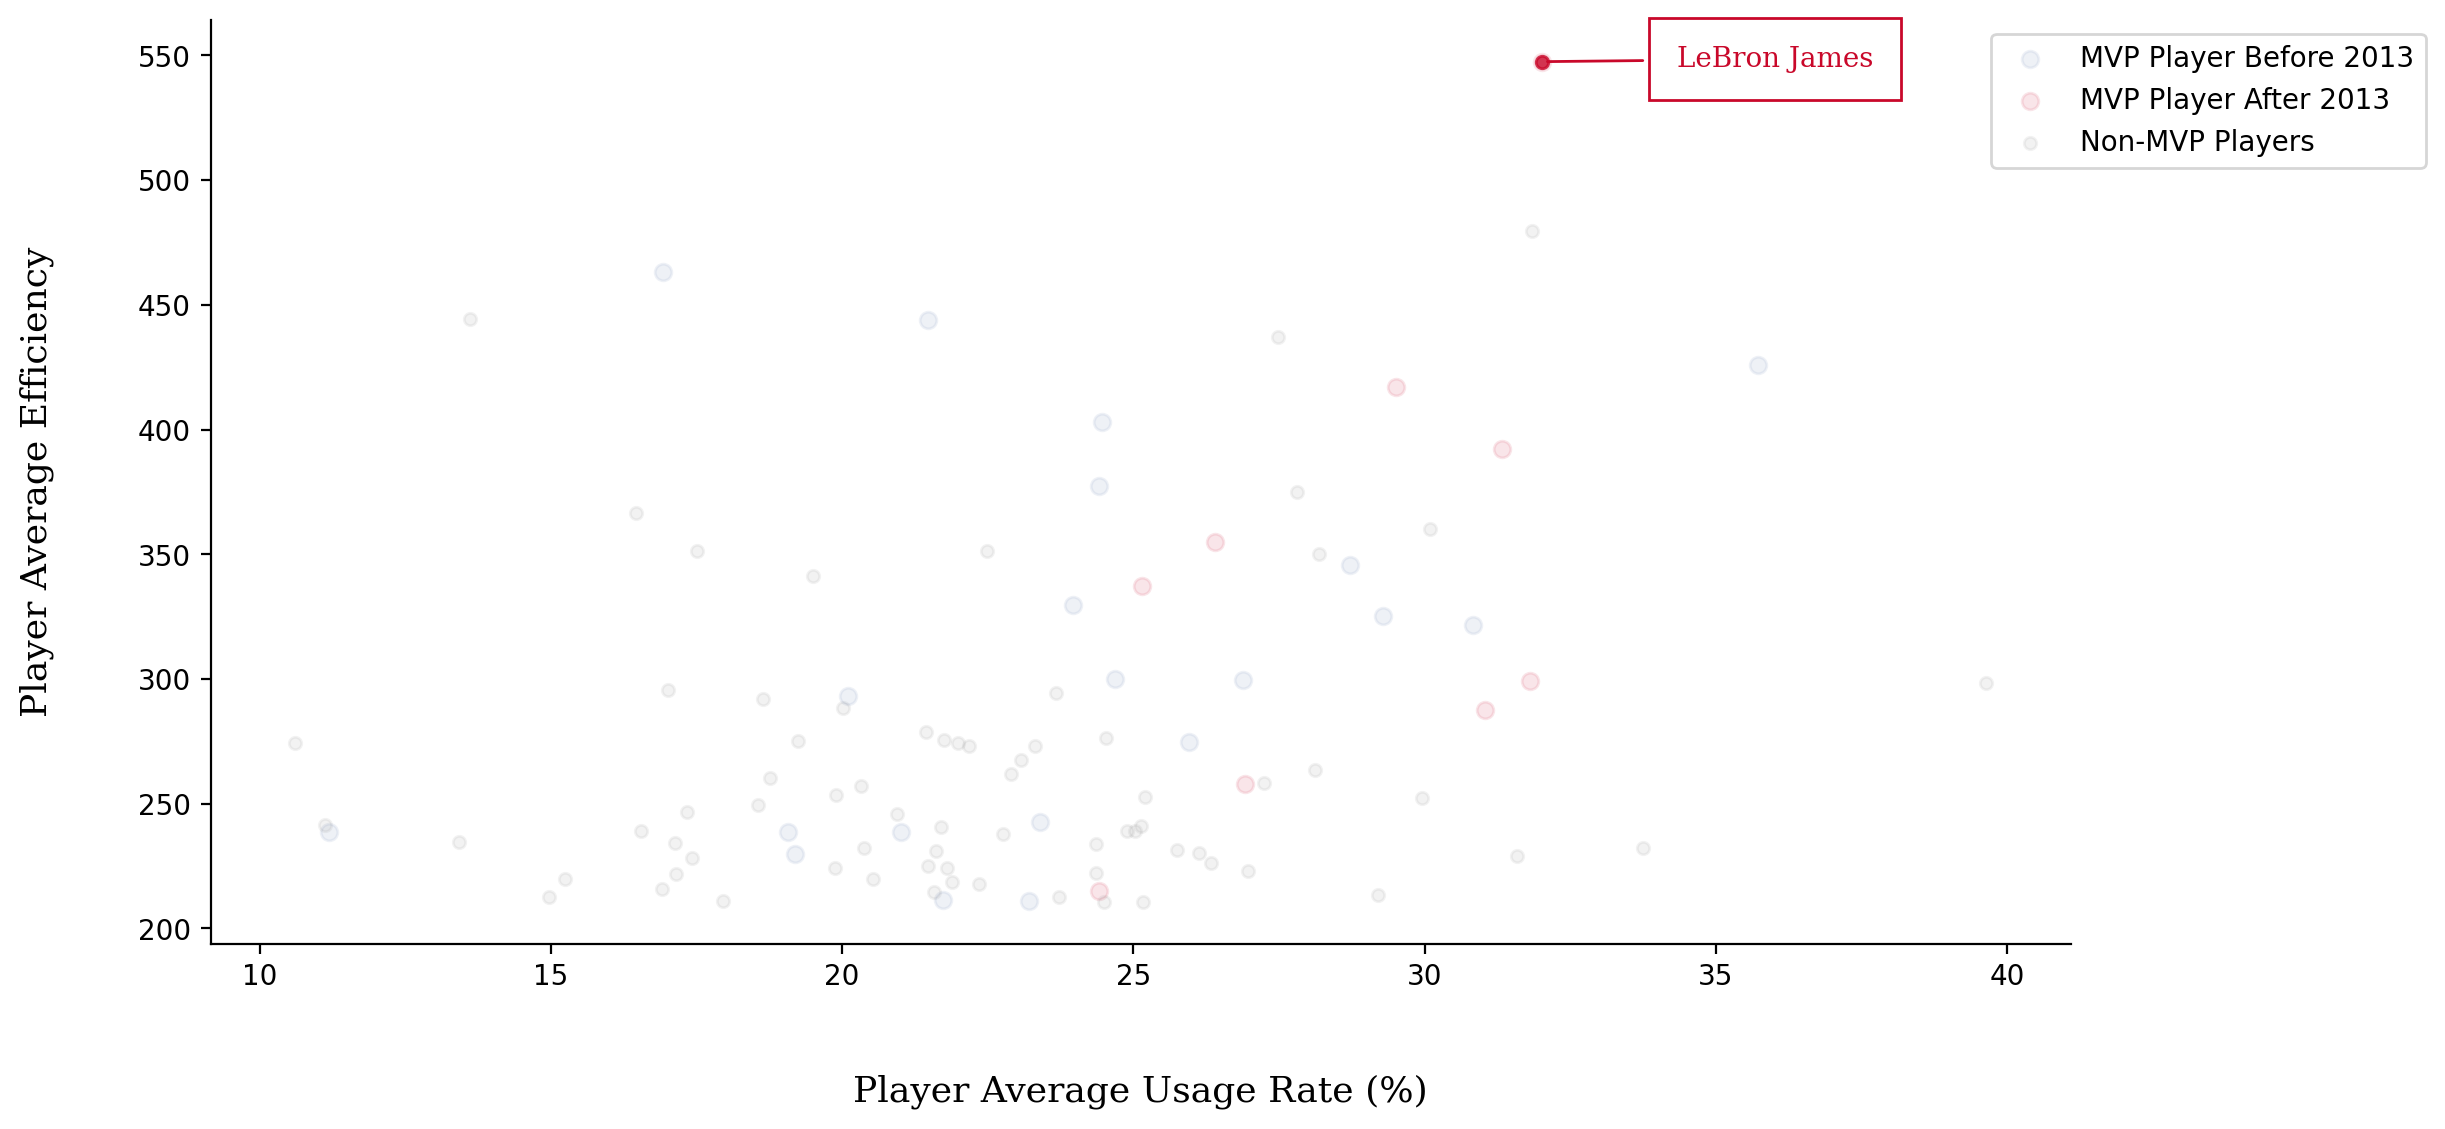

In [77]:
fig, ax = plt.subplots(figsize=(12, 6))

# draw points
ax.scatter(x_old_mvp, y_old_mvp, color=nba_blues[3], label="MVP Player Before 2013", alpha=0.1)
ax.scatter(x_new_mvp, y_new_mvp, color=nba_red, label="MVP Player After 2013", alpha=0.1)
ax.scatter(x_other, y_other, color='gray', s=20, label="Non-MVP Players", alpha=0.1)
ax.scatter(x_lebron_james, y_lebron_james, color=nba_red, s=20, alpha=0.8)


# legend
ax.legend(loc="upper left", bbox_to_anchor=(0.95,1))

# title and axis labels
# ax.set_title("Top 100 Players with Highest Average Efficiency and Usage", fontname="serif",pad=30, fontsize=16)
ax.set_xlabel("Player Average Usage Rate (%)", labelpad=30, fontsize=13, fontname="serif")
ax.set_ylabel("Player Average Efficiency", labelpad=30, fontsize=13, fontname="serif")

# hide frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# LeBron James
ax.annotate("LeBron James", xy=(x_lebron_james, y_lebron_james),
            xytext=(x_lebron_james+4, y_lebron_james-2),
            bbox=dict(boxstyle="square", fc="w",pad=1, color=nba_red),
            ha="center", fontname="serif", fontsize=10, color=nba_red,
            arrowprops=dict(arrowstyle="-",color=nba_red))


plt.show()

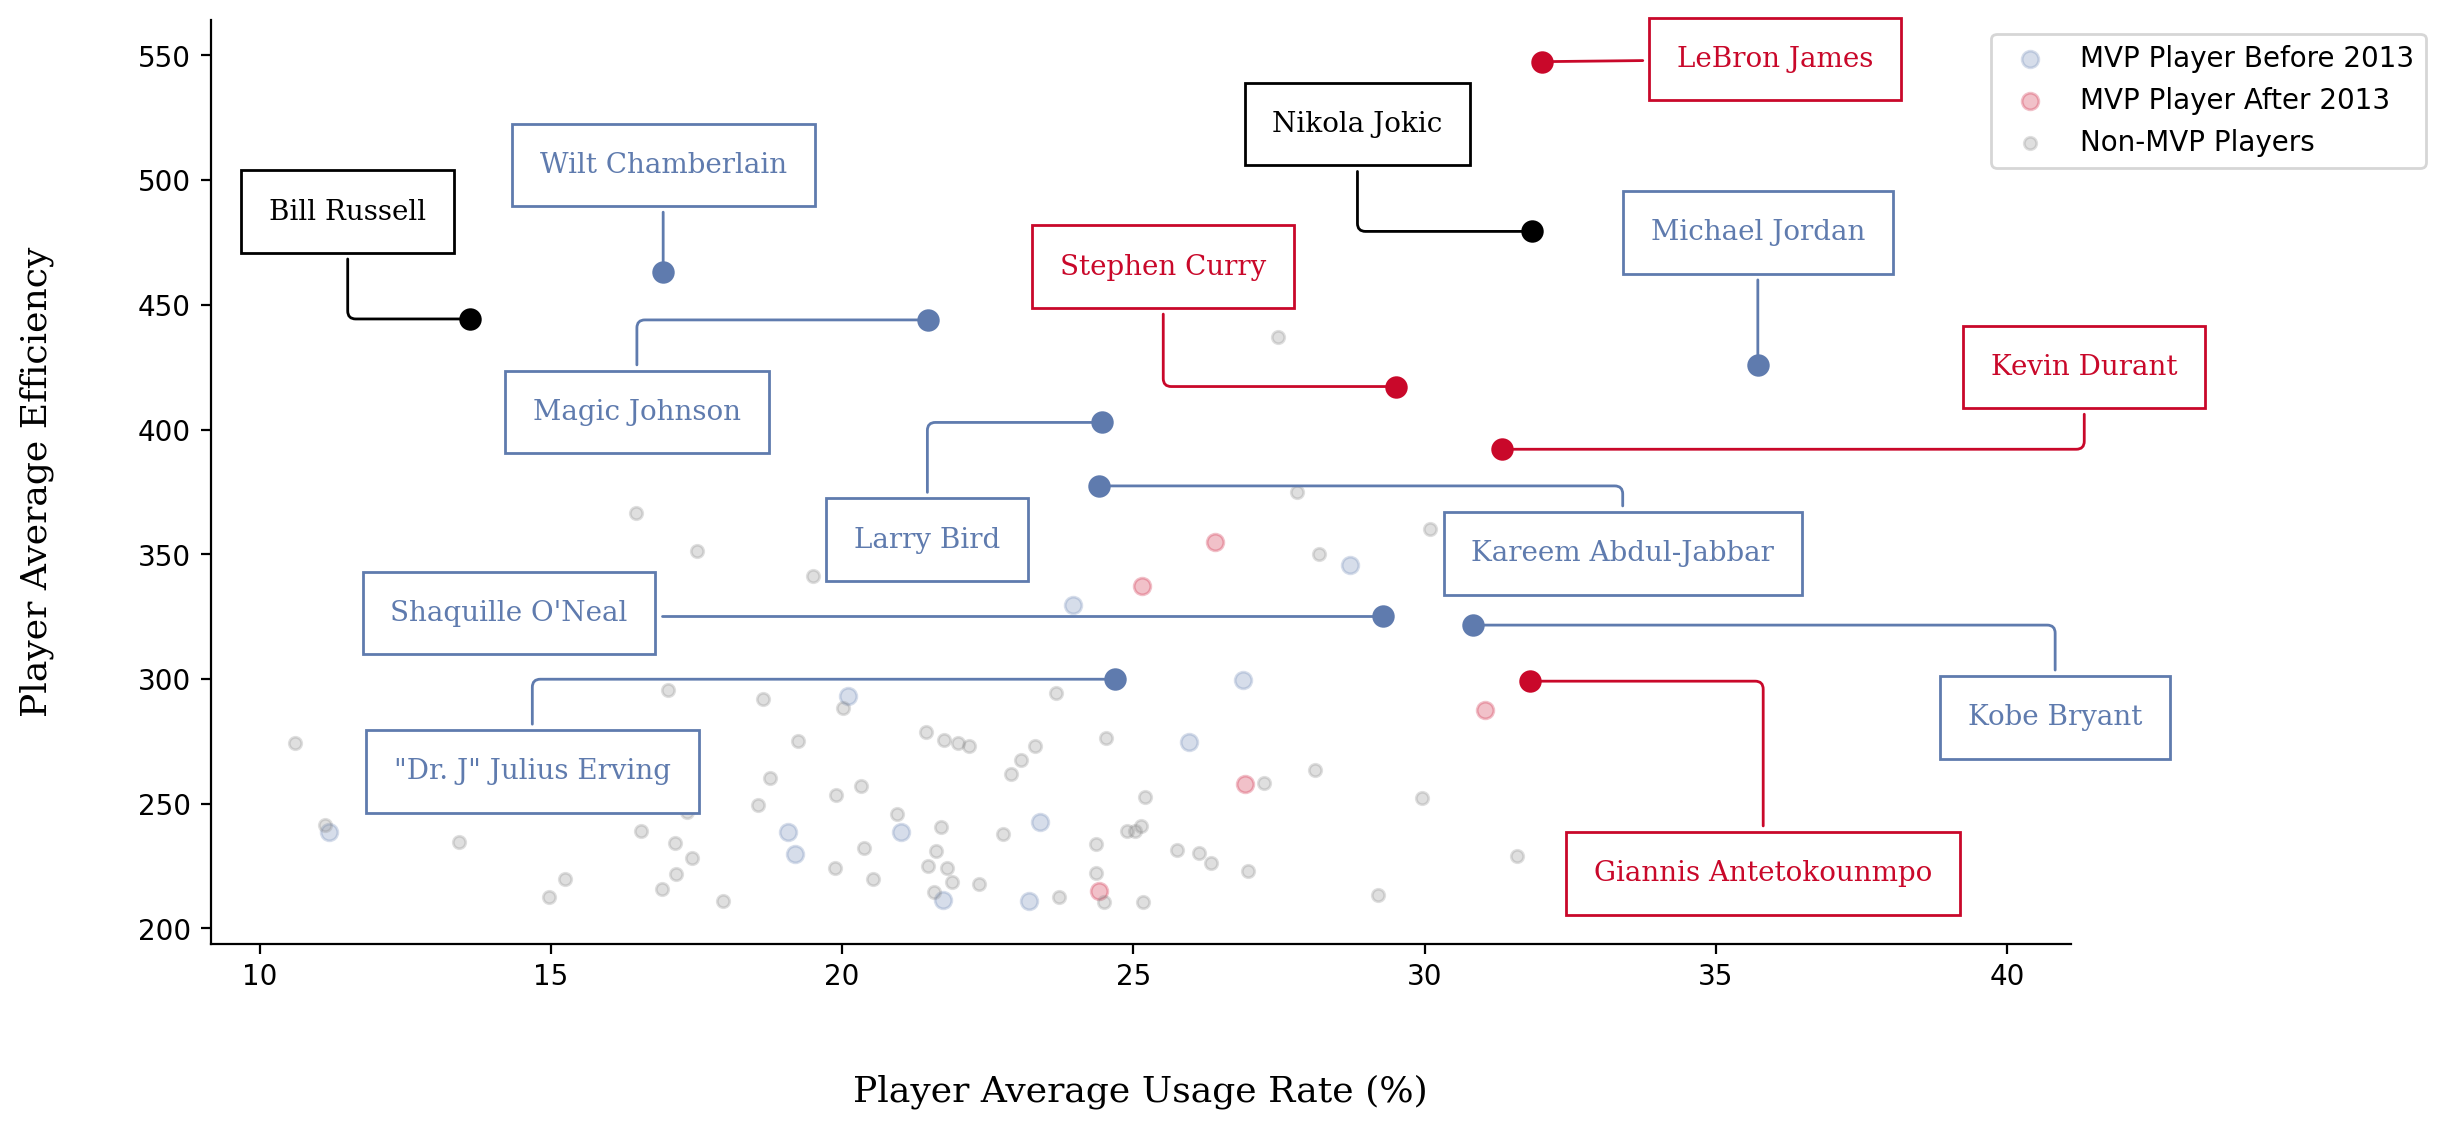

In [67]:
nikola_jokic = df_top_100_players.loc['Nikola Jokic']
wilt_chamberlain = df_top_100_players.loc['Wilt Chamberlain']
bill_russell = df_top_100_players.loc['Bill Russell']
stephen_curry = df_top_100_players.loc['Stephen Curry']
kareem = df_top_100_players.loc['Kareem Abdul-Jabbar']
kobe_bryant = df_top_100_players.loc['Kobe Bryant']
giannis = df_top_100_players.loc['Giannis Antetokounmpo']
shaq = df_top_100_players.loc["Shaquille O'Neal"]
dr_j = df_top_100_players.loc['Julius Erving']
kevin_durant = df_top_100_players.loc['Kevin Durant']
larry_bird = df_top_100_players.loc['Larry Bird']
magic_johnson = df_top_100_players.loc['Magic Johnson']
lebron_james = df_top_100_players.loc['LeBron James']
michael_jordan = df_top_100_players.loc['Michael Jordan']

x_lebron_james, y_lebron_james = lebron_james['Usage Rate'], lebron_james['Efficiency']
x_michael_jordan, y_michael_jordan = michael_jordan['Usage Rate'], michael_jordan['Efficiency']
x_nikola_jokic, y_nikola_jokic = nikola_jokic['Usage Rate'], nikola_jokic['Efficiency']
x_wilt_chamberlain, y_wilt_chamberlain = wilt_chamberlain['Usage Rate'], wilt_chamberlain['Efficiency']
x_bill_russell, y_bill_russell = bill_russell['Usage Rate'], bill_russell['Efficiency']
x_stephen_curry, y_stephen_curry = stephen_curry['Usage Rate'], stephen_curry['Efficiency']
x_kareem, y_kareem = kareem['Usage Rate'], kareem['Efficiency']
x_kobe_bryant, y_kobe_bryant = kobe_bryant['Usage Rate'], kobe_bryant['Efficiency']
x_giannis, y_giannis = giannis['Usage Rate'], giannis['Efficiency']
x_shaq, y_shaq = shaq['Usage Rate'], shaq['Efficiency']
x_dr_j, y_dr_j = dr_j['Usage Rate'], dr_j['Efficiency']
x_kevin_durant, y_kevin_durant = kevin_durant['Usage Rate'], kevin_durant['Efficiency']
x_larry_bird, y_larry_bird = larry_bird['Usage Rate'], larry_bird['Efficiency']
x_magic_johnson, y_magic_johnson = magic_johnson['Usage Rate'], magic_johnson['Efficiency']

fig, ax = plt.subplots(figsize=(12, 6))

# draw points
ax.scatter(x_old_mvp, y_old_mvp, color=nba_blues[3], label="MVP Player Before 2013", alpha=0.25)
ax.scatter(x_new_mvp, y_new_mvp, color=nba_red, label="MVP Player After 2013", alpha=0.25)
ax.scatter(x_other, y_other, color='gray', s=20, label="Non-MVP Players", alpha=0.25)
ax.scatter(x_lebron_james, y_lebron_james, color=lebron_james['Color'],s=50)
ax.scatter(x_michael_jordan, y_michael_jordan, color=michael_jordan['Color'],s=50)
ax.scatter(x_nikola_jokic, y_nikola_jokic, color='black',s=50)
ax.scatter(x_wilt_chamberlain, y_wilt_chamberlain, color=wilt_chamberlain['Color'],s=50)
ax.scatter(x_bill_russell, y_bill_russell, color='black',s=50)
ax.scatter(x_stephen_curry, y_stephen_curry, color=stephen_curry['Color'],s=50)
ax.scatter(x_kareem, y_kareem, color=kareem['Color'],s=50)
ax.scatter(x_kobe_bryant, y_kobe_bryant, color=kobe_bryant['Color'],s=50)
ax.scatter(x_giannis, y_giannis, color=giannis['Color'],s=50)
ax.scatter(x_shaq, y_shaq, color=shaq['Color'],s=50)
ax.scatter(x_dr_j, y_dr_j, color=dr_j['Color'],s=50)
ax.scatter(x_kevin_durant, y_kevin_durant, color=kevin_durant['Color'],s=50)
ax.scatter(x_larry_bird, y_larry_bird, color=larry_bird['Color'],s=50)
ax.scatter(x_magic_johnson, y_magic_johnson, color=magic_johnson['Color'],s=50)

# legend
ax.legend(loc="upper left", bbox_to_anchor=(0.95,1))

# title and axis labels
# ax.set_title("Top 100 Players with Highest Average Efficiency and Usage", fontname="serif",pad=30, fontsize=16)
ax.set_xlabel("Player Average Usage Rate (%)", labelpad=30, fontsize=13, fontname="serif")
ax.set_ylabel("Player Average Efficiency", labelpad=30, fontsize=13, fontname="serif")

# hide frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Michael Jordan
ax.annotate("Michael Jordan", xy=(x_michael_jordan, y_michael_jordan),
            xytext=(x_michael_jordan, y_michael_jordan+50),
            bbox=dict(boxstyle="square", fc="w",pad=1, color=michael_jordan['Color']),
            ha="center", fontname="serif", fontsize=10, color=michael_jordan['Color'],
            arrowprops=dict(arrowstyle="-",color=michael_jordan['Color']))
# LeBron James
ax.annotate("LeBron James", xy=(x_lebron_james, y_lebron_james),
            xytext=(x_lebron_james+4, y_lebron_james-2),
            bbox=dict(boxstyle="square", fc="w",pad=1, color=lebron_james['Color']),
            ha="center", fontname="serif", fontsize=10, color=lebron_james['Color'],
            arrowprops=dict(arrowstyle="-",color=lebron_james['Color']))

# Nikola Jokic
ax.annotate("Nikola Jokic", xy=(x_nikola_jokic, y_nikola_jokic),
            xytext=(x_nikola_jokic-3, y_nikola_jokic+40),
            bbox=dict(boxstyle="square", fc="w",pad=1, color='black'),
            ha="center", fontname="serif", fontsize=10, color='black',
            arrowprops=dict(arrowstyle="-",connectionstyle="angle,rad=8",color='black'))

# Wilt Chamberlain
ax.annotate("Wilt Chamberlain", xy=(x_wilt_chamberlain, y_wilt_chamberlain),
            xytext=(x_wilt_chamberlain, y_wilt_chamberlain+40),
            bbox=dict(boxstyle="square", fc="w",pad=1, color=wilt_chamberlain['Color']),
            ha="center", fontname="serif", fontsize=10, color=wilt_chamberlain['Color'],
            arrowprops=dict(arrowstyle="-",color=wilt_chamberlain['Color']))

# Bill Russell
ax.annotate("Bill Russell", xy=(x_bill_russell, y_bill_russell),
            xytext=(x_bill_russell-2.1, y_bill_russell+40),
            bbox=dict(boxstyle="square", fc="w",pad=1, color='black'),
            ha="center", fontname="serif", fontsize=10, color='black',
            arrowprops=dict(arrowstyle="-",connectionstyle="angle,rad=8",color='black'))

# Stephen Curry
ax.annotate("Stephen Curry", xy=(x_stephen_curry, y_stephen_curry),
            xytext=(x_stephen_curry-4, y_stephen_curry+45),
            bbox=dict(boxstyle="square", fc="w",pad=1, color=stephen_curry['Color']),
            ha="center", fontname="serif", fontsize=10, color=stephen_curry['Color'],
            arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=-90,angleB=-180,rad=8",color=stephen_curry['Color']))

# Kareem Abdul-Jabbar
ax.annotate("Kareem Abdul-Jabbar", xy=(x_kareem, y_kareem),
            xytext=(x_kareem+9, y_kareem-30),
            bbox=dict(boxstyle="square", fc="w",pad=1, color=kareem['Color']),
            ha="center", fontname="serif", fontsize=10, color=kareem['Color'],
            arrowprops=dict(arrowstyle="-",connectionstyle="angle,rad=8",color=kareem['Color']))

# Kobe Bryant
ax.annotate("Kobe Bryant", xy=(x_kobe_bryant, y_kobe_bryant),
            xytext=(x_kobe_bryant+10, y_kobe_bryant-40),
            bbox=dict(boxstyle="square", fc="w",pad=1, color=kobe_bryant['Color']),
            ha="center", fontname="serif", fontsize=10, color=kobe_bryant['Color'],
            arrowprops=dict(arrowstyle="-",connectionstyle="angle,rad=8",color=kobe_bryant['Color']))

# Giannis Antetokounmpo
ax.annotate("Giannis Antetokounmpo", xy=(x_giannis, y_giannis),
            xytext=(x_giannis+4, y_giannis-80),
            bbox=dict(boxstyle="square", fc="w",pad=1, color=giannis['Color']),
            ha="center", fontname="serif", fontsize=10, color=giannis['Color'],
            arrowprops=dict(arrowstyle="-",connectionstyle="angle,rad=8",color=giannis['Color']))

# Shaquille O'Neal
ax.annotate("Shaquille O'Neal", xy=(x_shaq, y_shaq),
            xytext=(x_shaq-15, y_shaq-2),
            bbox=dict(boxstyle="square", fc="w",pad=1, color=shaq['Color']),
            ha="center", fontname="serif", fontsize=10, color=shaq['Color'],
            arrowprops=dict(arrowstyle="-",connectionstyle="angle,rad=8",color=shaq['Color']))

# Julius Erving
ax.annotate('"Dr. J" Julius Erving', xy=(x_dr_j, y_dr_j),
            xytext=(x_dr_j-10, y_dr_j-40),
            bbox=dict(boxstyle="square", fc="w",pad=1, color=dr_j['Color']),
            ha="center", fontname="serif", fontsize=10, color=dr_j['Color'],
            arrowprops=dict(arrowstyle="-",connectionstyle="angle,rad=8",color=dr_j['Color']))

# Kevin Durant
ax.annotate("Kevin Durant", xy=(x_kevin_durant, y_kevin_durant),
            xytext=(x_kevin_durant+10, y_kevin_durant+30),
            bbox=dict(boxstyle="square", fc="w",pad=1, color=kevin_durant['Color']),
            ha="center", fontname="serif", fontsize=10, color=kevin_durant['Color'],
            arrowprops=dict(arrowstyle="-",connectionstyle="angle,rad=8",color=kevin_durant['Color']))

# Larry Bird
ax.annotate("Larry Bird", xy=(x_larry_bird, y_larry_bird),
            xytext=(x_larry_bird-3, y_larry_bird-50),
            bbox=dict(boxstyle="square", fc="w",pad=1, color=larry_bird['Color']),
            ha="center", fontname="serif", fontsize=10, color=larry_bird['Color'],
            arrowprops=dict(arrowstyle="-",connectionstyle="angle,rad=8",color=larry_bird['Color']))

# Magic Johnson
ax.annotate("Magic Johnson", xy=(x_magic_johnson, y_magic_johnson),
            xytext=(x_magic_johnson-5, y_magic_johnson-40),
            bbox=dict(boxstyle="square", fc="w",pad=1, color=magic_johnson['Color']),
            ha="center", fontname="serif", fontsize=10, color=magic_johnson['Color'],
            arrowprops=dict(arrowstyle="-",connectionstyle="angle,rad=8",color=magic_johnson['Color']))
plt.show()

In [ ]:
df_top_100_players.head(30)

,Efficiency,Usage Rate,Games Played,Minutes Played,Year Last Played,MVP At Least Once?,Color,Alpha,Size
Player,,,,,,,,,
LeBron James,547.437500,32.015358,17.625000,728.375000,2023,True,#C9082A,0.8,40
Nikola Jokic,479.400000,31.848568,13.600000,511.000000,2023,False,gray,0.3,20
Wilt Chamberlain,463.076923,16.925796,12.307692,581.461538,1973,True,#5f7bae,0.8,40
Bill Russell,444.307692,13.608465,12.692308,576.692308,1969,False,gray,0.3,20
Magic Johnson,443.923077,21.474589,14.615385,579.846154,1996,True,#5f7bae,0.8,40
Jamal Murray,437.000000,27.487133,17.666667,686.666667,2023,False,gray,0.3,20
Michael Jordan,425.923077,35.724057,13.769231,574.923077,1998,True,#5f7bae,0.8,40
Stephen Curry,417.222222,29.513551,16.333333,610.222222,2023,True,#C9082A,0.8,40
Larry Bird,402.833333,24.462918,13.666667,573.833333,1992,True,#5f7bae,0.8,40


## Why is rank negatively correlated with most of the numeric features?
*Because players want to have lower rank! They want to be #1!*

In [80]:
df_nba_main.sort_values(by='Rank', ascending=True).head(50)

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,AST/TOV,STL/TOV,Team Official Name,Team Full Description,Team Total FG Attempts,Team Total FT Attempts,Team Total Turnovers,Team Total Minutes Played,Team Total Games Played,Usage Rate
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,...,NaN,NaN,Golden State Warriors,Philadelphia Warriors (Now Golden State Warriors),5367,2143,695.682322,16014,606,24.749677
9301,1,1988-89,1988,Playoffs,893,Michael Jordan,1610612741,CHI,17,718,...,1.91,0.62,Chicago Bulls,Chicago Bulls,1328,494,256.000000,4130,171,35.684564
9313,1,1989-90,1989,Regular Season,893,Michael Jordan,1610612741,CHI,82,3197,...,2.10,0.92,Chicago Bulls,Chicago Bulls,7070,2133,1194.000000,19772,834,33.851935
9326,1,1989-90,1989,Playoffs,893,Michael Jordan,1610612741,CHI,16,674,...,1.95,0.80,Chicago Bulls,Chicago Bulls,1302,483,226.000000,3840,163,36.135154
9338,1,1990-91,1990,Regular Season,893,Michael Jordan,1610612741,CHI,82,3034,...,2.24,1.10,Chicago Bulls,Chicago Bulls,7125,2111,1148.000000,19755,898,33.034085
9350,1,1990-91,1990,Playoffs,893,Michael Jordan,1610612741,CHI,17,689,...,3.30,0.93,Chicago Bulls,Chicago Bulls,1354,452,199.000000,4105,181,32.928550
9362,1,1991-92,1991,Regular Season,893,Michael Jordan,1610612741,CHI,80,3102,...,2.44,0.91,Chicago Bulls,Chicago Bulls,7145,2124,1042.000000,19775,894,31.835599
9375,1,1991-92,1991,Playoffs,893,Michael Jordan,1610612741,CHI,22,920,...,1.57,0.54,Chicago Bulls,Chicago Bulls,1750,612,288.000000,5305,234,37.245756
9387,1,1992-93,1992,Regular Season,893,Michael Jordan,1610612741,CHI,78,3067,...,2.07,1.07,Chicago Bulls,Chicago Bulls,7261,1964,1075.000000,20169,913,35.172551
9403,1,1992-93,1992,Playoffs,893,Michael Jordan,1610612741,CHI,19,783,...,2.53,0.87,Chicago Bulls,Chicago Bulls,1563,487,222.000000,4635,200,38.334536
